# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

<i>From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.</i> 

-----

According to an article published by McKinsey & Company*, the retail institutional used-card market in the United States and Europe is projected to generate $1.2 trillion in revenue in 2023. However, the fragmentation of this market has resulted in a slow adoption of innovative digital and analytics capabilities by its participants. Therefore, the competitive advantage is held by those who have adopted a ditial-first strategy. 

In contrast to the pricing of new cars where the retail price is suggested by the manufacturer, the price of used cars vary widely due to factors such as make, model, year, milege, condition, size, fuel system, location, etc. Moreover, cars considered "collectibles" can sell for a significant amount of money, even if they were manufactured several decades ago. 

With the goal of helping our client understand what are the main factors that drive the price of used  cars, we have been provided a dataset containing over 425,000 entries categorized in 18 columns. By using different data modeling techniques, we aim to select the most important features that lead us the most accurate model for the prediction of the price (target variable). 

<i>*Reference: https://www.mckinsey.com/industries/automotive-and-assembly/our-insights/data-and-analytics-in-the-drivers-seat-of-the-used-car-market</i>


### Data Understanding

<i>After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.</i>

---------

We start by importing some of the main packages to help us import and explore the dataset:

In [2288]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

The dataset provided by the client is formated as a CSV file named "vehicles.csv". We will use Pandas to import the file and create a Dataframe for further exploration. 

In [2289]:
# Data loading
data = pd.read_csv('data/vehicles.csv') 

# Preliminary data exploration 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [2290]:
# Retrieve the first 10 rows
data.head(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


#### Data description
Although no description was provided with the dataset, the content of the columns can be inferred by their names:
- id: Numerical identifier in the database system where the data was stored
- region: the region (city or area) where the car is located
- price: the price of the used car
- year: the year when the car was manufactured
- manufacturer: the manufacturer / brand of the car
- model: the specific model of the car
- condition: the physical condition of the car (i.e. new, like, new, good, etc.)
- cylinders: the number of cylinders in the engine of the car.
- fuel: the type of combustion system for the car (i.e. "fuel", "diesel", "electric")
- odometer: the total milage on the car
- title_status: the status of the title (i.e. "clean", "lien", "missing", etc.)
- transmission: the type of transmission for the car (i.e. "automatic", "manual", etc.)
- VIN: vehicle identitication number. 
- drive: the type of drive for the car (i.e. "front wheel drive", "rear wheel drive", "four wheel drive")
- size: the size of the car (i.e. "small", "medium", "full size")
- type: the body type of the car (i.e. "sedan", "van", "convertible", "bus", etc.)
- pain_color: the color of the car
- state: the name of the state (in USA) where the car is located 


#### Preliminary Observations
1. The dataset contains a total of 426,880 entries distributed in 18 features (columns). 
2. From the 18 features only four are numeric and the rest are categorical. 
3. The four numerical features are: "id", "price", "year", and "odometer" 
4. The cylinders column might be a candidate to convert into a int value
5. Several columns contain null values 

Since our goal is to determine the most important features of the dataset to build a prediction model for the price (target variable), we will identify the columns that contain null values and then compare it to the total number of entries. The purpose is to calculate the percentage of data that will be lost by removing the entries that contain null values. 


In [2291]:
# Create a dataframe with the rows that contain null values and show the total null values (count)
missing_data = pd.DataFrame(data.isna().sum(), columns=['count'])

# Calculate the percentage of missing data per column and append it to the dataframe
missing_data['percentage'] = (missing_data['count'] / len(data)) * 100

# Sort the values by descening order and display the dataframe 
missing_data.sort_values('count', ascending=False)

,count,percentage
size,306361,71.767476
cylinders,177678,41.622470
condition,174104,40.785232
VIN,161042,37.725356
drive,130567,30.586347
paint_color,130203,30.501078
type,92858,21.752717
manufacturer,17646,4.133714
title_status,8242,1.930753
model,5277,1.236179


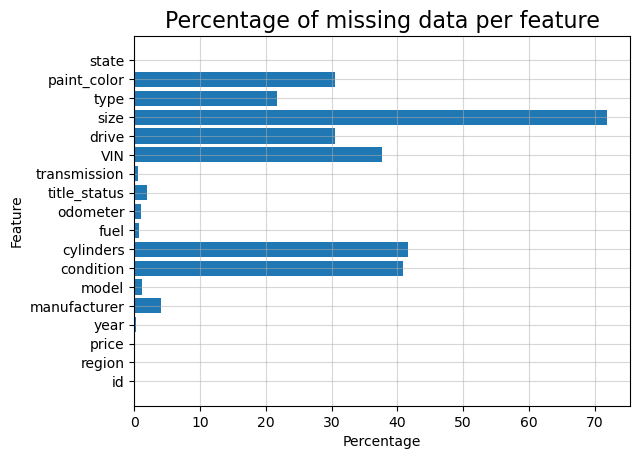

In [2292]:
# Generate a horizontal bar chart to visualize the percentage of missing data (null values) per feature 
plt.barh(y=missing_data.index, width=missing_data['percentage'])
plt.title("Percentage of missing data per feature", fontsize=16)
plt.xlabel("Percentage")
plt.ylabel("Feature")
plt.grid(alpha=0.5)

#### Observations about the missing data: 
1. The size column is missing on 306,361 of the entries. Considering the total entries on the dataset is 426,880, dropping the entries missing the "size" value will result in a 71.7% data loss. 
2. However, based on common knowledge we assume that this feature is relevant for the determination of price. For example, usually SUVs are more expensive than small sized cars. 
3. Cylinders, condition, VIN, drive and paint_color also are also missing from about a 40% of the entries.
4. Since VIN is an identification number, this feature should not be a determining factor for the price of an used car. 
5. Paint color is missing from about 30% of the entries, while type is missing from about 22% of the total entries. 

<strong>IMPORTANT</strong>
During the data evaluation phase we determined that the size column is not a major factor when determining the price of an used car. Therefore, to avoid loosing ~70% of the data, we instead decided to run another iteration and drop the size column for the entire dataset.

In [2293]:
data_without_size_column = data.drop('size', axis=1)

### Data Preparation

<i>After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. </i>

---------

Since our goal is to determine what the most important features are for the the prediction of price, we will initially focus on the data that contains all the features. This means, we'll drop all the entries that contain null values. However, once we identify the most relevant features, will come back to the original data to see if we benefit from a larger population (larger number of entries). 

In [2294]:
# Drop entries with null values and create a copy of the resulting dataframe
data_dropna = data_without_size_column.dropna().copy()

# Display new dataframe without null values
data_dropna

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state
32,7316343444,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,1GT220CG8CZ231238,4wd,pickup,black,al
33,7316304717,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,1GCVKREH6GZ228691,4wd,pickup,silver,al
35,7316257769,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,1GCHTCE37G1186784,4wd,pickup,red,al
36,7316133914,auburn,38590,2011.0,chevrolet,corvette grand sport,good,8 cylinders,gas,30237.0,clean,other,1G1YR3DW3B5102190,rwd,other,red,al
38,7315816316,auburn,32990,2017.0,jeep,wrangler unlimited sport,good,6 cylinders,gas,30041.0,clean,other,1C4BJWDG5HL705371,4wd,other,silver,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,7301952155,wyoming,48590,2020.0,cadillac,xt6 premium luxury,good,6 cylinders,gas,7701.0,clean,other,1GYKPCRSXLZ181516,fwd,other,black,wy
426860,7301951544,wyoming,39990,2017.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,41664.0,clean,automatic,JN8AZ2NE3H9156734,4wd,other,black,wy
426866,7301949190,wyoming,32990,2016.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,55612.0,clean,automatic,JN8AZ2NF5G9611039,rwd,other,black,wy
426874,7301591199,wyoming,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,clean,automatic,JTHBZ1BLXJA012999,rwd,sedan,white,wy


In [2295]:
# Calulate total data loss (percentage) after dropping entries with null values
data_loss_pct = 100 - ((len(data_dropna) / len(data)) * 100)
data_loss_pct


85.70909857571215

We can see that the removing of the entries with null values resulted in a 85.71% data loss. Since this is a very significant data loss, we will definitely consider recovering some of this data once we determine the main features for the prediction model.   

Another important observation is that price for some of the entries is "0". We'll explore further:

In [2296]:
# Select entries where price == 0. Sort by descending order
data_dropna.query("price == 0").sort_values(by='year', ascending=False)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state
305570,7312944614,oklahoma city,0,2021.0,chevrolet,silverado 1500,excellent,8 cylinders,gas,14319.0,clean,automatic,3GCPYFEL2MG114466,4wd,truck,black,ok
291849,7305570821,cincinnati,0,2021.0,chevrolet,tahoe,excellent,8 cylinders,gas,6380.0,clean,automatic,1GNSKPKD7MR109110,4wd,SUV,blue,oh
196560,7316286395,detroit metro,0,2021.0,chrysler,pacifica touring,new,6 cylinders,gas,18.0,clean,automatic,2C4RC1BG0MR524520,fwd,mini-van,white,mi
50893,7310942233,reno / tahoe,0,2021.0,nissan,titan,like new,8 cylinders,gas,2200.0,clean,automatic,1N6AA1EDXMN505889,4wd,truck,red,ca
196557,7316290240,detroit metro,0,2021.0,chrysler,pacifica touring,new,6 cylinders,gas,12.0,clean,automatic,2C4RC1FG3MR509939,fwd,mini-van,silver,mi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348201,7307973794,greenville / upstate,0,1987.0,mercedes-benz,560,good,8 cylinders,gas,101792.0,clean,automatic,WDBBA48D0HA056626,rwd,convertible,silver,sc
144426,7316705650,rockford,0,1982.0,chevrolet,corvette,excellent,8 cylinders,gas,47853.0,clean,automatic,1G1AY8788C5110625,rwd,coupe,red,il
52130,7316503258,sacramento,0,1977.0,bmw,320i,fair,4 cylinders,gas,99999.0,clean,manual,5404709,rwd,coupe,black,ca
191997,7315234690,worcester / central MA,0,1976.0,dodge,w300,excellent,8 cylinders,gas,24031.0,clean,manual,W31BJ6S326704,4wd,truck,green,ma


As it can be seen on the first 5 entries from the last query, the price set to "0" on some of these relatively new cars seems to be an error. Since this is the case for 3,082 entries, this will most likely distort the precision of our model. Thereofore, we will create a new data frame that excludes these problematic entries.

In [2297]:
# Create a new data set "data_clean" that excludes the entries with price == 0
data_clean = data_dropna.query('price > 0')
data_clean

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state
32,7316343444,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,1GT220CG8CZ231238,4wd,pickup,black,al
33,7316304717,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,1GCVKREH6GZ228691,4wd,pickup,silver,al
35,7316257769,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,1GCHTCE37G1186784,4wd,pickup,red,al
36,7316133914,auburn,38590,2011.0,chevrolet,corvette grand sport,good,8 cylinders,gas,30237.0,clean,other,1G1YR3DW3B5102190,rwd,other,red,al
38,7315816316,auburn,32990,2017.0,jeep,wrangler unlimited sport,good,6 cylinders,gas,30041.0,clean,other,1C4BJWDG5HL705371,4wd,other,silver,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,7301952155,wyoming,48590,2020.0,cadillac,xt6 premium luxury,good,6 cylinders,gas,7701.0,clean,other,1GYKPCRSXLZ181516,fwd,other,black,wy
426860,7301951544,wyoming,39990,2017.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,41664.0,clean,automatic,JN8AZ2NE3H9156734,4wd,other,black,wy
426866,7301949190,wyoming,32990,2016.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,55612.0,clean,automatic,JN8AZ2NF5G9611039,rwd,other,black,wy
426874,7301591199,wyoming,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,clean,automatic,JTHBZ1BLXJA012999,rwd,sedan,white,wy


We suspect there might be other entries with problematic prices. For that reason, we will explore the histagram of the 100 least expensive cars:  

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'odometer'}>, <Axes: >]], dtype=object)

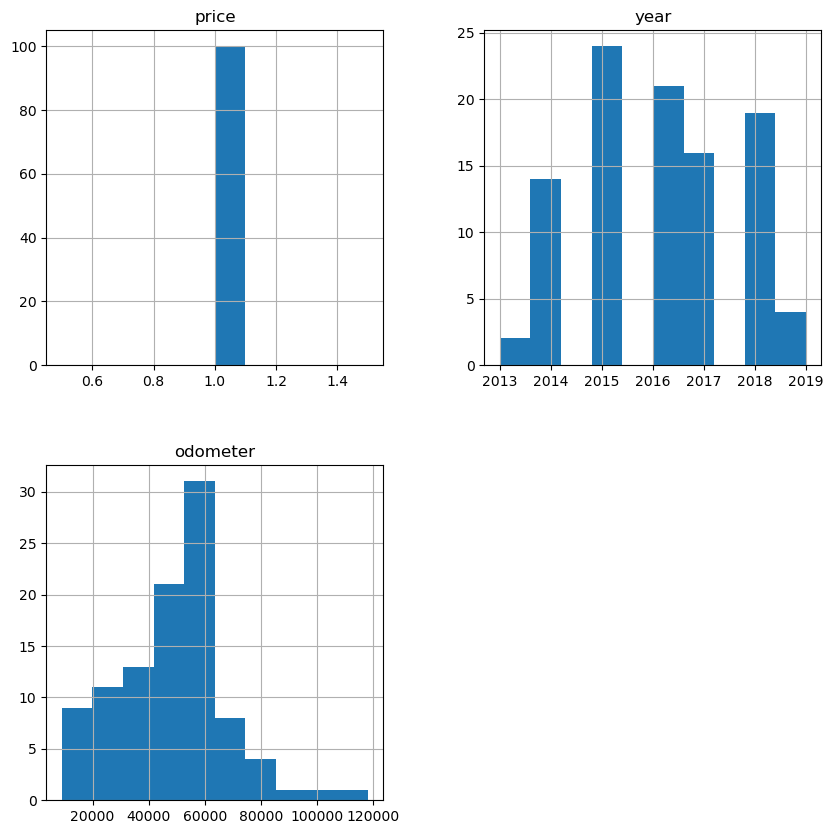

In [2298]:
# Select the 100 least expensive cars and create a histogram containing price, year and odometer
data_clean[['price', 'year', 'odometer']].sort_values(by="price", ascending=True).iloc[0:100].hist(figsize=(10,10))

There is something interesting shown on these histograms: the price of these 100 least expensive cars is 1 while the year is between ~2012 and ~2020. Based on common sense, the seems to be another problem with the price of these entries. Let's explore further:  

In [2299]:
# Display the least 100 cars as a table
data_clean.sort_values(by="price", ascending=True).iloc[0:100]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state
105341,7314815900,orlando,1,2015.0,lexus,is 250,excellent,10 cylinders,gas,30920.0,clean,other,JTHBF1D27F5062448,4wd,sedan,white,fl
97005,7313915647,gainesville,1,2015.0,bmw,6 series,excellent,10 cylinders,gas,48826.0,clean,automatic,WBA6B4C56FD986118,rwd,sedan,white,fl
97004,7313915682,gainesville,1,2013.0,bmw,7 series,excellent,8 cylinders,gas,66035.0,clean,other,WBAYE8C5XDD132186,4wd,sedan,silver,fl
114820,7307749625,space coast,1,2017.0,dodge,challenger,excellent,8 cylinders,gas,59580.0,clean,other,2C3CDZBT4HH568681,4wd,coupe,black,fl
97003,7313915699,gainesville,1,2015.0,lexus,rc 350,excellent,6 cylinders,gas,41987.0,clean,other,JTHHE5BC8F5005501,4wd,coupe,black,fl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98789,7313919393,jacksonville,1,2014.0,bmw,m6,excellent,8 cylinders,gas,59964.0,clean,other,WBS6C9C57ED467311,4wd,sedan,silver,fl
98790,7313919324,jacksonville,1,2014.0,mercedes-benz,e-class,excellent,10 cylinders,gas,62399.0,clean,automatic,WDDHF5KB3EB049580,rwd,sedan,silver,fl
98791,7313919236,jacksonville,1,2016.0,dodge,challenger,excellent,8 cylinders,gas,19155.0,clean,automatic,2C3CDZC99GH322694,rwd,coupe,black,fl
99115,7312862486,jacksonville,1,2018.0,bmw,x6,excellent,6 cylinders,gas,27588.0,clean,other,5UXKU2C59J0Z62085,4wd,sedan,white,fl


Based on the type of vehicles and brands, we can assume the price == 1 is also an error. We'll filter these out from our clean dataframe.


In [2300]:
# Select entries where price is greater than 1
data_clean = data_clean.query('price > 1')

# Show an overview of the statistics
data_clean.describe()

,id,price,year,odometer
count,5.723200e+04,57232.000000,57232.000000,5.723200e+04
mean,7.311480e+09,20332.940575,2012.240460,9.149848e+04
std,4.306977e+06,13567.175121,6.709081,9.706329e+04
min,7.301588e+09,3.000000,1905.000000,0.000000e+00
25%,7.308248e+09,8995.000000,2010.000000,3.856525e+04
50%,7.312323e+09,16995.000000,2013.000000,8.722850e+04
75%,7.315112e+09,29990.000000,2017.000000,1.300000e+05
max,7.317099e+09,155000.000000,2022.000000,9.999999e+06


We can see that we still have a minimum value of "3" in the price. We should continue exploring: 

In [2301]:
# Display the first 1000 least expensive cars 
data_clean.sort_values(by="price", ascending=True).iloc[0:1000]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state
297060,7308292096,columbus,3,2009.0,pontiac,vibe,good,4 cylinders,gas,129342.0,clean,automatic,5Y2SM67079Z457824,fwd,hatchback,silver,oh
410029,7315548933,skagit / island / SJI,5,1999.0,toyota,sienna,fair,6 cylinders,gas,304000.0,clean,automatic,4T3ZF13C5XU102837,fwd,mini-van,brown,wa
187182,7314757613,boston,6,2004.0,ford,f150 stx 4x2,excellent,8 cylinders,gas,168.0,clean,automatic,1FTRF02W04KB00245,rwd,pickup,yellow,ma
405718,7309317163,moses lake,7,1986.0,toyota,rogue rv,fair,4 cylinders,gas,76000.0,clean,automatic,JT5RN75U8G0002226,fwd,other,white,wa
98245,7315624604,jacksonville,9,1992.0,ford,f-350,good,8 cylinders,gas,100000.0,clean,manual,2FDKF37H8NCB19432,rwd,truck,white,fl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214830,7316266052,minneapolis / st paul,2500,2003.0,ford,taurus,excellent,6 cylinders,gas,151125.0,clean,automatic,1FAFP55293A243209,fwd,sedan,grey,mn
249610,7316375926,central NJ,2500,1995.0,jeep,wrangler,fair,4 cylinders,gas,212500.0,clean,manual,1J4FY19P4SP224661,4wd,SUV,white,nj
111312,7316782650,south florida,2500,2015.0,bmw,x5 xdrive35i sport,like new,6 cylinders,gas,80653.0,clean,automatic,5UXKR0C55F0K66210,4wd,SUV,white,fl
79761,7308414482,fort collins / north CO,2500,1997.0,subaru,legacy outback,good,4 cylinders,gas,223800.0,clean,automatic,4S3BG6859V7638284,4wd,mini-van,red,co


We can see that although there's only one entry with price == 3, the prices still seem too low for some of these entries. The forth entry show on the table above (index=275907) is for a Nissan Quest from 2017, like new, with only 54,800 miles priced at 6 dollars. By looking at other similar entries, it seems like the price entered is missing three zeros on the right. For example, instead of 6 dollars should be 6,000 dollars.

Since there could be used cars in bad condition at a very low price, we will use a filter to assess the number of cars that are in conditions other than "salvage" and "fair", that are priced below zero and that are from 2010 and above. The results of these query will be filtered out from the data_clean dataframe.

In [2302]:
# Get unique value counts for "condition"
data_clean['condition'].value_counts()

good         27242
excellent    24781
like new      4409
fair           576
new            186
salvage         38
Name: condition, dtype: int64

In [2303]:
# Create array to filter out "salvage" and "fair"
condition_filter_out = ['salvage', 'fair']

# Create filter for cars with condition other than "salvage" and "fair", that are priced below zero and that are from 2010 and above.
suspicious_price_filter = 'price < 1000 & year > 2010 & condition not in @condition_filter_out'

# Get a list of suspicious priced cars
data_clean.query(suspicious_price_filter)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state
8573,7314878435,flagstaff / sedona,587,2018.0,honda,civic,excellent,4 cylinders,gas,50916.0,clean,automatic,SHHFK7H55JU229918,fwd,hatchback,black,az
8624,7314383203,flagstaff / sedona,405,2011.0,honda,cr v,excellent,4 cylinders,gas,52261.0,clean,automatic,5J6RE3H32BL030024,fwd,SUV,red,az
9011,7307806468,flagstaff / sedona,537,2017.0,nissan,maxima,excellent,6 cylinders,gas,60805.0,clean,automatic,1N4AA6AP6HC396368,fwd,sedan,white,az
9198,7304229262,flagstaff / sedona,755,2019.0,honda,odyssey,excellent,6 cylinders,gas,21351.0,clean,automatic,5FNRL6H26KB128335,fwd,mini-van,silver,az
9257,7303189613,flagstaff / sedona,418,2012.0,nissan,frontier,excellent,6 cylinders,gas,129020.0,clean,automatic,1N6AD0ER7CC461762,rwd,truck,blue,az
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335259,7307715848,philadelphia,495,2012.0,chevrolet,silverado 1500,excellent,8 cylinders,gas,94280.0,clean,automatic,1GCRKSE75CZ214355,4wd,truck,custom,pa
335260,7307715854,philadelphia,495,2013.0,gmc,acadia,excellent,6 cylinders,gas,99165.0,clean,automatic,1GKKRNED9DJ134694,rwd,SUV,red,pa
335261,7307715829,philadelphia,495,2014.0,acura,ilx,excellent,4 cylinders,gas,88836.0,clean,automatic,19VDE1F74EE001642,fwd,sedan,grey,pa
335262,7307715758,philadelphia,495,2020.0,toyota,corolla,excellent,4 cylinders,gas,9819.0,clean,automatic,5YFEPRAE1LP050464,fwd,sedan,red,pa


In [2304]:
# Get an overview of the statistics for the suspicious results 
data_clean.query(suspicious_price_filter).describe()

,id,price,year,odometer
count,1.960000e+02,196.000000,196.000000,196.000000
mean,7.312721e+09,352.275510,2015.566327,72751.122449
std,3.554293e+06,183.277247,2.439144,42939.428020
min,7.302525e+09,13.000000,2011.000000,4365.000000
25%,7.309839e+09,248.750000,2014.000000,42702.250000
50%,7.313991e+09,315.000000,2016.000000,60805.000000
75%,7.315510e+09,426.000000,2017.000000,97385.000000
max,7.316975e+09,999.000000,2021.000000,210320.000000


As confirmed by the statistics, the mean price for these relatively new vehicles is 315 dollars. As mentioned before, they seem to be missing some zeros on the right side. However, since these are only 79 entries, we will drop them from the clean dataframe.

In [2305]:
# Create dataframe of "suspicious" prices as determined on the query  
suspicious_prices = data_clean.query(suspicious_price_filter)

In [2306]:
# Remove entries with suspicios prices by concatenating the data_clean dataframe and removing duplicates 
data_clean = pd.concat([data_clean, suspicious_prices]).drop_duplicates(keep=False)

As stated before, we don't expect the VIN number to be a determining factor for predicting the price of a used car. Thefore, we will drop this column at this point.

In [2307]:
# Drop VIN column from data_clean dataframe 
data_clean = data_clean.drop(columns=['VIN'], axis=1)
data_clean

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
32,7316343444,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al
33,7316304717,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,al
35,7316257769,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,al
36,7316133914,auburn,38590,2011.0,chevrolet,corvette grand sport,good,8 cylinders,gas,30237.0,clean,other,rwd,other,red,al
38,7315816316,auburn,32990,2017.0,jeep,wrangler unlimited sport,good,6 cylinders,gas,30041.0,clean,other,4wd,other,silver,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,7301952155,wyoming,48590,2020.0,cadillac,xt6 premium luxury,good,6 cylinders,gas,7701.0,clean,other,fwd,other,black,wy
426860,7301951544,wyoming,39990,2017.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,41664.0,clean,automatic,4wd,other,black,wy
426866,7301949190,wyoming,32990,2016.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,55612.0,clean,automatic,rwd,other,black,wy
426874,7301591199,wyoming,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,clean,automatic,rwd,sedan,white,wy


### Data Formatting

Now we're going to explore the opportunities to transform categorical features into numerical features.

#### Cylinders
The first attribute we'll explore is the "cylinders" since it's the first one that seems like a good candidate for conversion:

In [2308]:
# Display the count of unique values for "cylinders"
data_clean['cylinders'].value_counts()

6 cylinders     22209
8 cylinders     17474
4 cylinders     16384
10 cylinders      366
5 cylinders       365
other             115
3 cylinders       102
12 cylinders       21
Name: cylinders, dtype: int64

As it can be seen all values except "other" contain a clear numerical element. We're going to explore the characteristics of the entries that have "other" as the value for their cylinders:

In [2309]:
# Select entries where cylinders == other
data_clean.query('cylinders == "other"')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
8455,7301681997,southeast alaska,24995,2019.0,nissan,leaf sl,like new,other,electric,5650.0,clean,automatic,fwd,other,white,ak
10077,7316801699,phoenix,29999,2013.0,tesla,s,good,other,electric,61467.0,clean,automatic,rwd,sedan,blue,az
10720,7316516307,phoenix,5500,2013.0,nissan,leaf,good,other,electric,74200.0,clean,automatic,fwd,hatchback,white,az
12611,7315581491,phoenix,37988,2014.0,tesla,model s,excellent,other,electric,69974.0,clean,automatic,rwd,sedan,green,az
15542,7313443002,tucson,4995,2013.0,nissan,leaf s,excellent,other,electric,67260.0,clean,automatic,fwd,hatchback,red,az
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401112,7309813564,bellingham,28500,2013.0,tesla,s p85+,excellent,other,electric,103700.0,clean,other,rwd,sedan,blue,wa
409647,7316296173,seattle-tacoma,10000,2016.0,volkswagen,e-golf,excellent,other,electric,26864.0,clean,automatic,fwd,hatchback,blue,wa
409778,7316264362,seattle-tacoma,60000,2004.0,volvo,roll off dumpster,excellent,other,diesel,364000.0,clean,automatic,4wd,truck,white,wa
412397,7314687886,yakima,17599,2018.0,nissan,leaf,like new,other,electric,14500.0,clean,other,fwd,hatchback,blue,wa


As shown on the table, the entries with cylinders set to "other" are those of the electric cars. This is because electric motors do not have cylinders. Therefore, we're going to set this value to 0 so that we can convert this column int a numerical one.

In [2310]:
# Define custom function to convert cylinders to numeric feature
def convert_cylinders_to_numeric(value):
    if value == 'other':
        return 0
    else:        
        # Returns a substring of the first 2 values and converts it to an int
        return int(value[0:2])

# Apply custom function to convert cylinders to numeric feature
data_clean['cylinders'] = data_clean['cylinders'].apply(lambda x: convert_cylinders_to_numeric(x))
data_clean

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
32,7316343444,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8,gas,68696.0,clean,other,4wd,pickup,black,al
33,7316304717,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6,gas,29499.0,clean,other,4wd,pickup,silver,al
35,7316257769,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6,gas,17302.0,clean,other,4wd,pickup,red,al
36,7316133914,auburn,38590,2011.0,chevrolet,corvette grand sport,good,8,gas,30237.0,clean,other,rwd,other,red,al
38,7315816316,auburn,32990,2017.0,jeep,wrangler unlimited sport,good,6,gas,30041.0,clean,other,4wd,other,silver,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,7301952155,wyoming,48590,2020.0,cadillac,xt6 premium luxury,good,6,gas,7701.0,clean,other,fwd,other,black,wy
426860,7301951544,wyoming,39990,2017.0,infiniti,qx80 sport utility 4d,good,8,gas,41664.0,clean,automatic,4wd,other,black,wy
426866,7301949190,wyoming,32990,2016.0,infiniti,qx80 sport utility 4d,good,8,gas,55612.0,clean,automatic,rwd,other,black,wy
426874,7301591199,wyoming,33590,2018.0,lexus,gs 350 sedan 4d,good,6,gas,30814.0,clean,automatic,rwd,sedan,white,wy


Now we're going to convert the condition feature:

In [2311]:
# explore condition feature unique values
data_clean['condition'].value_counts()

good         27209
excellent    24711
like new      4317
fair           576
new            185
salvage         38
Name: condition, dtype: int64

We can see that the condition can be converted to a numerical value based on the condition quality: 
- salvage = 0
- fair = 1
- good = 2
- excellent = 3
- like new = 4 
- new = 5

In [2312]:
# Apply lambda function to convert condition feature into numerical avalue 
data_clean['condition'] = data_clean['condition'].apply(lambda x : ['salvage', 'fair', 'good', 'excellent', 'like new', 'new'].index(x))
data_clean

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
32,7316343444,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,2,8,gas,68696.0,clean,other,4wd,pickup,black,al
33,7316304717,auburn,34590,2016.0,chevrolet,silverado 1500 double,2,6,gas,29499.0,clean,other,4wd,pickup,silver,al
35,7316257769,auburn,29990,2016.0,chevrolet,colorado extended cab,2,6,gas,17302.0,clean,other,4wd,pickup,red,al
36,7316133914,auburn,38590,2011.0,chevrolet,corvette grand sport,2,8,gas,30237.0,clean,other,rwd,other,red,al
38,7315816316,auburn,32990,2017.0,jeep,wrangler unlimited sport,2,6,gas,30041.0,clean,other,4wd,other,silver,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,7301952155,wyoming,48590,2020.0,cadillac,xt6 premium luxury,2,6,gas,7701.0,clean,other,fwd,other,black,wy
426860,7301951544,wyoming,39990,2017.0,infiniti,qx80 sport utility 4d,2,8,gas,41664.0,clean,automatic,4wd,other,black,wy
426866,7301949190,wyoming,32990,2016.0,infiniti,qx80 sport utility 4d,2,8,gas,55612.0,clean,automatic,rwd,other,black,wy
426874,7301591199,wyoming,33590,2018.0,lexus,gs 350 sedan 4d,2,6,gas,30814.0,clean,automatic,rwd,sedan,white,wy


Now explore the region and state features:

In [2313]:
# Get unique value counts for the region
data_clean['region'].value_counts()

vermont               914
jacksonville          653
rochester             619
anchorage / mat-su    615
stockton              583
                     ... 
imperial county         2
northeast SD            1
logan                   1
st louis                1
southwest TX            1
Name: region, Length: 398, dtype: int64

As we can see, the values of the region column seem somehow unstructured. For example, "southwest TX", seem to contain the abbreviated state "TX". We are going to drop this feature from the data_clean dataframe since converting it to a numerical value requires geodecoding.

In [2314]:
# Drop "region" feature
data_clean = data_clean.drop('region', axis=1)

Let's see what the state feature contains:

In [2315]:
# Display unique value counts for state
data_clean['state'].value_counts()

ca    6409
fl    4041
ny    3291
tx    2660
mi    2259
nc    2163
oh    2090
pa    2065
wi    2036
ia    1874
va    1693
tn    1473
nj    1409
ma    1408
or    1343
il    1279
in    1271
mn    1250
co    1089
az    1031
ks     973
ky     936
ok     934
vt     914
sc     825
ga     792
ct     790
al     744
mo     717
id     690
ak     620
wa     537
nm     504
md     491
mt     477
dc     389
nv     379
ri     355
la     326
ar     323
nh     318
hi     274
me     259
de     203
ut     198
wv     192
ne     181
sd     178
nd     135
ms     125
wy     123
Name: state, dtype: int64

Although the "state" column seems to be well formatted, converting to a numerical feature requires geodecoding and we don't suspect this feature is a major factor when determining the price. Therefore, we're also going to drop it.

In [2316]:
# Drop state column
data_clean = data_clean.drop('state', axis=1)


<strong>IMPORTANT:</strong> 
<p><i>The following section for "size" is commented out intentionally since during the evaluation process we determined that the size feature was not a major factor for determining the price of an used car. Therefore, we decided to do another iteration without this feature. However, we left the following section for reference purposes</i> </p>

<p>We're now going to explore "size":</p>

In [2317]:
#data_clean['size'].value_counts()

Following the same rationale for "condition", we're going to assign numerical values as follows:
- sub-compact = 0
- compact = 1
- midsize = 2
- full-size = 3

In [2318]:
# Apply lambda function to convert size to numerical value
#data_clean['size'] = data_clean['size'].apply(lambda x: ['sub-compact', 'compact', 'mid-size', 'full-size'].index(x))
#data_clean


Now we're going to explore the conversion of the fuel feature:

In [2319]:
# Get unique value counts for fuel
data_clean['fuel'].value_counts()

gas         51364
diesel       3317
other        1634
hybrid        595
electric      126
Name: fuel, dtype: int64

We will assign a numerical value based on the mean prince of the cars for each of the fuel type. For this, we'll create a bar plot using Seaborn:

Text(0.5, 1.0, 'Price comparison by fuel type')

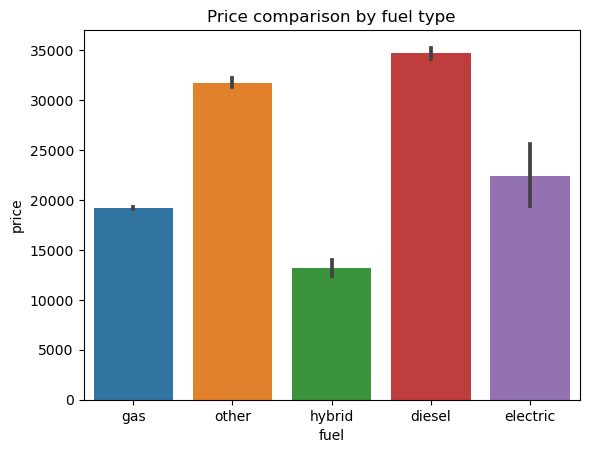

In [2320]:
# Generate bar plot with price and fuel data
sns.barplot(data_clean[['price', 'fuel']], y='price', x='fuel').set_title("Price comparison by fuel type")


The visualization helps us determine the difference of prices (mean) by fuel type. Based on the mean of the price we will assign a numerical value:

In [2321]:
# Create list of possible values ordered by preference (least to most expensive)
fuel_preference = list(data_clean.groupby('fuel')[['price']].mean().sort_values(by='price', ascending=True).index)
fuel_preference

['hybrid', 'gas', 'electric', 'other', 'diesel']

In [2322]:
# Apply lambda function to convert fuel into numerical value
data_clean['fuel'] = data_clean['fuel'].apply(lambda x : fuel_preference.index(x))

In [2323]:
data_clean

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
32,7316343444,27990,2012.0,gmc,sierra 2500 hd extended cab,2,8,1,68696.0,clean,other,4wd,pickup,black
33,7316304717,34590,2016.0,chevrolet,silverado 1500 double,2,6,1,29499.0,clean,other,4wd,pickup,silver
35,7316257769,29990,2016.0,chevrolet,colorado extended cab,2,6,1,17302.0,clean,other,4wd,pickup,red
36,7316133914,38590,2011.0,chevrolet,corvette grand sport,2,8,1,30237.0,clean,other,rwd,other,red
38,7315816316,32990,2017.0,jeep,wrangler unlimited sport,2,6,1,30041.0,clean,other,4wd,other,silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,7301952155,48590,2020.0,cadillac,xt6 premium luxury,2,6,1,7701.0,clean,other,fwd,other,black
426860,7301951544,39990,2017.0,infiniti,qx80 sport utility 4d,2,8,1,41664.0,clean,automatic,4wd,other,black
426866,7301949190,32990,2016.0,infiniti,qx80 sport utility 4d,2,8,1,55612.0,clean,automatic,rwd,other,black
426874,7301591199,33590,2018.0,lexus,gs 350 sedan 4d,2,6,1,30814.0,clean,automatic,rwd,sedan,white


Using the same rationale we used for fuel type we're going to convert the transmission feature into a numerical value:

In [2324]:
# Get unique value counts for transmission 
data_clean['transmission'].value_counts()

automatic    42975
other        11625
manual        2436
Name: transmission, dtype: int64

We will assign a numerical value based on the mean price of the cars for each of the transmission type. For this, we'll create a bar plot using Seaborn:

Text(0.5, 1.0, 'Price comparison by transmission type')

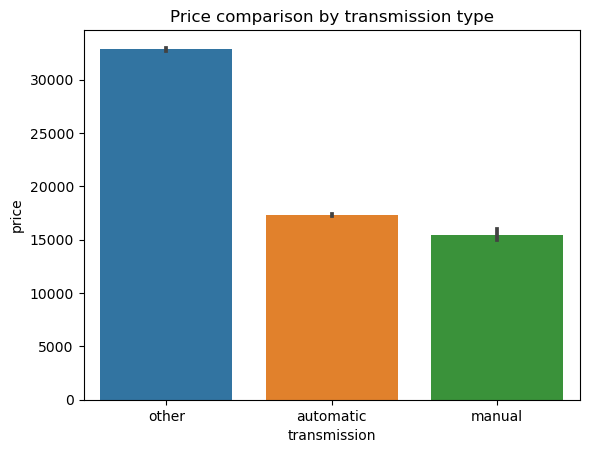

In [2325]:
# Generate bar plot with price and transmission data
sns.barplot(data_clean[['price', 'transmission']], y='price', x='transmission').set_title("Price comparison by transmission type")

In [2326]:
# Create list of possible values ordered by preference (least to most expensive)
transmission_preference = list(data_clean.groupby('transmission')[['price']].mean().sort_values(by='price', ascending=True).index)

# Apply custom function to convert transmission into numerical value
data_clean['transmission'] = data_clean['transmission'].apply(lambda x : transmission_preference.index(x))

In [2327]:
data_clean

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
32,7316343444,27990,2012.0,gmc,sierra 2500 hd extended cab,2,8,1,68696.0,clean,2,4wd,pickup,black
33,7316304717,34590,2016.0,chevrolet,silverado 1500 double,2,6,1,29499.0,clean,2,4wd,pickup,silver
35,7316257769,29990,2016.0,chevrolet,colorado extended cab,2,6,1,17302.0,clean,2,4wd,pickup,red
36,7316133914,38590,2011.0,chevrolet,corvette grand sport,2,8,1,30237.0,clean,2,rwd,other,red
38,7315816316,32990,2017.0,jeep,wrangler unlimited sport,2,6,1,30041.0,clean,2,4wd,other,silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,7301952155,48590,2020.0,cadillac,xt6 premium luxury,2,6,1,7701.0,clean,2,fwd,other,black
426860,7301951544,39990,2017.0,infiniti,qx80 sport utility 4d,2,8,1,41664.0,clean,1,4wd,other,black
426866,7301949190,32990,2016.0,infiniti,qx80 sport utility 4d,2,8,1,55612.0,clean,1,rwd,other,black
426874,7301591199,33590,2018.0,lexus,gs 350 sedan 4d,2,6,1,30814.0,clean,1,rwd,sedan,white


Using the same rationale we're going to convert the title_status feature into a numerical value:

In [2328]:
# Get unique value counts for the title_status
data_clean['title_status'].value_counts()

clean         55519
rebuilt        1029
salvage         302
lien            167
missing          15
parts only        4
Name: title_status, dtype: int64

We will assign a numerical value based on the mean price of the cars for each of the title_status. For this, we'll create a bar plot using Seaborn:

Text(0.5, 1.0, 'Price comparison by title_status')

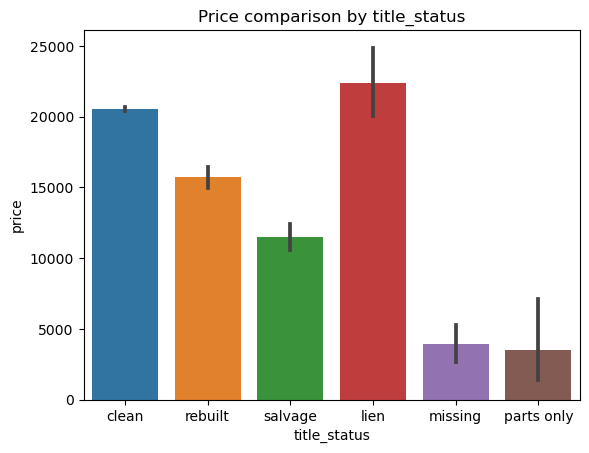

In [2329]:
# Generate bar plot with price and title_status data
sns.barplot(data_clean[['price', 'title_status']], y='price', x='title_status').set_title("Price comparison by title_status")

In [2330]:
# Create list of possible values ordered by preference (least to most expensive)
title_status_preference = list(data_clean.groupby('title_status')[['price']].mean().sort_values(by='price', ascending=True).index)

# Apply lambda function to convert title_status into numerical value
data_clean['title_status'] = data_clean['title_status'].apply(lambda x : title_status_preference.index(x))
data_clean

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
32,7316343444,27990,2012.0,gmc,sierra 2500 hd extended cab,2,8,1,68696.0,4,2,4wd,pickup,black
33,7316304717,34590,2016.0,chevrolet,silverado 1500 double,2,6,1,29499.0,4,2,4wd,pickup,silver
35,7316257769,29990,2016.0,chevrolet,colorado extended cab,2,6,1,17302.0,4,2,4wd,pickup,red
36,7316133914,38590,2011.0,chevrolet,corvette grand sport,2,8,1,30237.0,4,2,rwd,other,red
38,7315816316,32990,2017.0,jeep,wrangler unlimited sport,2,6,1,30041.0,4,2,4wd,other,silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,7301952155,48590,2020.0,cadillac,xt6 premium luxury,2,6,1,7701.0,4,2,fwd,other,black
426860,7301951544,39990,2017.0,infiniti,qx80 sport utility 4d,2,8,1,41664.0,4,1,4wd,other,black
426866,7301949190,32990,2016.0,infiniti,qx80 sport utility 4d,2,8,1,55612.0,4,1,rwd,other,black
426874,7301591199,33590,2018.0,lexus,gs 350 sedan 4d,2,6,1,30814.0,4,1,rwd,sedan,white


Using the same rationale we're going to convert the paint_color feature into a numerical value:

In [2331]:
# Get unique value counts for paint color
data_clean['paint_color'].value_counts()

white     14971
black     11779
silver     7943
red        6079
blue       5929
grey       5541
green      1421
brown      1284
custom     1251
yellow      413
orange      286
purple      139
Name: paint_color, dtype: int64

We will assign a numerical value based on the mean price of the cars for each of the paint color. For this, we'll create a bar plot using Seaborn:

Text(0.5, 1.0, 'Price comparison by paint_color')

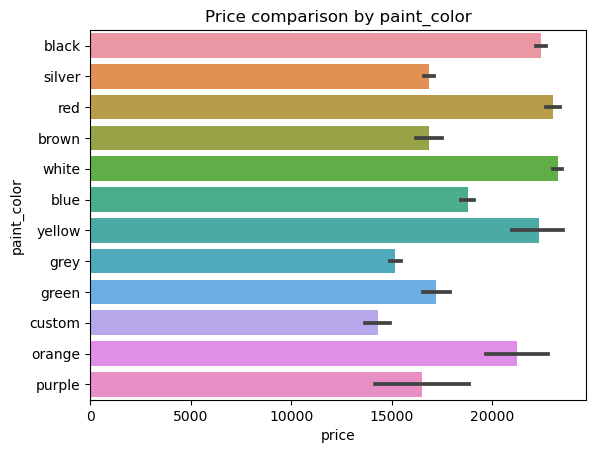

In [2332]:
# Generate bar plot with price and pain_color data
sns.barplot(data_clean[['price', 'paint_color']], x='price', y='paint_color').set_title("Price comparison by paint_color")

To assign a numeric value, we'll create a dataframe that contains only price and paint_color, group it by paint_color and calculate the mean price of each group. Then we'll create a list of the colors in ascending order based on mean price.

In [2333]:
# Create list of possible values ordered by preference (least to most expensive)
paint_color_preference = list(data_clean.groupby('paint_color')[['price']].mean().sort_values(by='price', ascending=True).index)

# Apply lambda function to convert pain_color into numerical value
data_clean['paint_color'] = data_clean['paint_color'].apply(lambda x : paint_color_preference.index(x))
data_clean

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
32,7316343444,27990,2012.0,gmc,sierra 2500 hd extended cab,2,8,1,68696.0,4,2,4wd,pickup,9
33,7316304717,34590,2016.0,chevrolet,silverado 1500 double,2,6,1,29499.0,4,2,4wd,pickup,4
35,7316257769,29990,2016.0,chevrolet,colorado extended cab,2,6,1,17302.0,4,2,4wd,pickup,10
36,7316133914,38590,2011.0,chevrolet,corvette grand sport,2,8,1,30237.0,4,2,rwd,other,10
38,7315816316,32990,2017.0,jeep,wrangler unlimited sport,2,6,1,30041.0,4,2,4wd,other,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,7301952155,48590,2020.0,cadillac,xt6 premium luxury,2,6,1,7701.0,4,2,fwd,other,9
426860,7301951544,39990,2017.0,infiniti,qx80 sport utility 4d,2,8,1,41664.0,4,1,4wd,other,9
426866,7301949190,32990,2016.0,infiniti,qx80 sport utility 4d,2,8,1,55612.0,4,1,rwd,other,9
426874,7301591199,33590,2018.0,lexus,gs 350 sedan 4d,2,6,1,30814.0,4,1,rwd,sedan,11


Using the same rationale we're going to convert the drive type feature into a numerical value:

In [2334]:
# Get unique value counts for drive 
data_clean['drive'].value_counts()

4wd    25546
fwd    17915
rwd    13575
Name: drive, dtype: int64

We will assign a numerical value based on the mean price of the cars for each of the drive type. For this, we'll create a bar plot using Seaborn:

Text(0.5, 1.0, 'Price comparison by drive type')

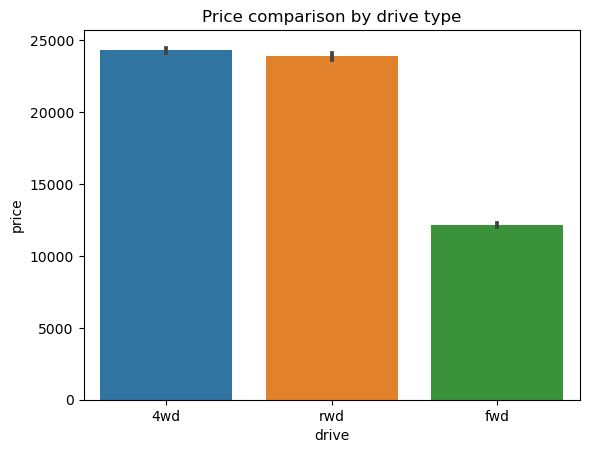

In [2335]:
# Generate bar plot with price and drive data
sns.barplot(data_clean[['price', 'drive']], y='price', x='drive').set_title("Price comparison by drive type")

In [2336]:
# Create list of possible values ordered by preference (least to most expensive)
drive_preference = list(data_clean.groupby('drive')[['price']].mean().sort_values(by='price', ascending=True).index)

# Apply lambda function to convert drive into numerical value
data_clean['drive'] = data_clean['drive'].apply(lambda x : drive_preference.index(x))
data_clean

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
32,7316343444,27990,2012.0,gmc,sierra 2500 hd extended cab,2,8,1,68696.0,4,2,2,pickup,9
33,7316304717,34590,2016.0,chevrolet,silverado 1500 double,2,6,1,29499.0,4,2,2,pickup,4
35,7316257769,29990,2016.0,chevrolet,colorado extended cab,2,6,1,17302.0,4,2,2,pickup,10
36,7316133914,38590,2011.0,chevrolet,corvette grand sport,2,8,1,30237.0,4,2,1,other,10
38,7315816316,32990,2017.0,jeep,wrangler unlimited sport,2,6,1,30041.0,4,2,2,other,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,7301952155,48590,2020.0,cadillac,xt6 premium luxury,2,6,1,7701.0,4,2,0,other,9
426860,7301951544,39990,2017.0,infiniti,qx80 sport utility 4d,2,8,1,41664.0,4,1,2,other,9
426866,7301949190,32990,2016.0,infiniti,qx80 sport utility 4d,2,8,1,55612.0,4,1,1,other,9
426874,7301591199,33590,2018.0,lexus,gs 350 sedan 4d,2,6,1,30814.0,4,1,1,sedan,11


Using the same rationale we're going to convert the type feature into a numerical value:


In [2337]:
# Get unique value counts for drive 
data_clean['type'].value_counts()

sedan          14070
SUV            12704
pickup          7713
truck           7470
coupe           4195
other           2839
van             2092
hatchback       1845
wagon           1691
convertible     1299
mini-van         964
offroad           97
bus               57
Name: type, dtype: int64

Text(0.5, 1.0, 'Price comparison by type')

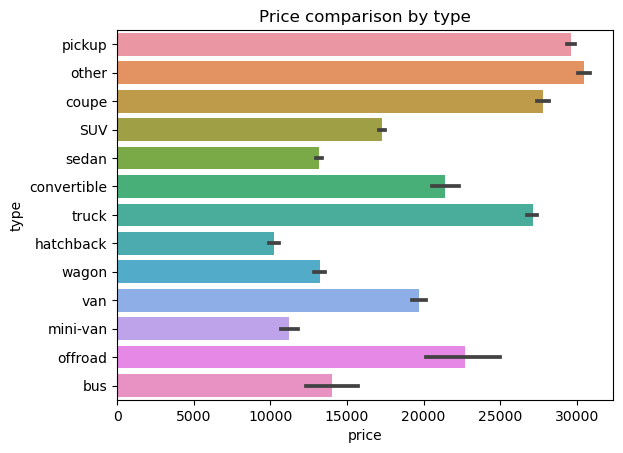

In [2338]:
# Generate bar plot with price and type data
sns.barplot(data_clean[['price', 'type']], x='price', y='type').set_title("Price comparison by type")

To assign a numeric value, we'll create a dataframe that contains only price and type, group it by type and calculate the mean price of each group. Then we'll create a list of the types in ascending order based on mean price and we'll apply a lambda function to convert to a numeric type

In [2339]:
# Create list of possible values ordered by preference (least to most expensive)
type_preference = list(data_clean.groupby('type')[['price']].mean().sort_values(by='price', ascending=True).index)

# Apply lambda function to convert type into numerical value
data_clean['type'] = data_clean['type'].apply(lambda x : type_preference.index(x))
data_clean

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
32,7316343444,27990,2012.0,gmc,sierra 2500 hd extended cab,2,8,1,68696.0,4,2,2,11,9
33,7316304717,34590,2016.0,chevrolet,silverado 1500 double,2,6,1,29499.0,4,2,2,11,4
35,7316257769,29990,2016.0,chevrolet,colorado extended cab,2,6,1,17302.0,4,2,2,11,10
36,7316133914,38590,2011.0,chevrolet,corvette grand sport,2,8,1,30237.0,4,2,1,12,10
38,7315816316,32990,2017.0,jeep,wrangler unlimited sport,2,6,1,30041.0,4,2,2,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,7301952155,48590,2020.0,cadillac,xt6 premium luxury,2,6,1,7701.0,4,2,0,12,9
426860,7301951544,39990,2017.0,infiniti,qx80 sport utility 4d,2,8,1,41664.0,4,1,2,12,9
426866,7301949190,32990,2016.0,infiniti,qx80 sport utility 4d,2,8,1,55612.0,4,1,1,12,9
426874,7301591199,33590,2018.0,lexus,gs 350 sedan 4d,2,6,1,30814.0,4,1,1,2,11


Using the same rationale we're going to convert the manufacturer feature into a numerical value:


In [1922]:
# Select unique value counts of manufacturers
data_clean['manufacturer'].value_counts()

ford               6920
chevrolet          4802
toyota             2653
honda              1813
nissan             1557
ram                1394
gmc                1351
jeep               1244
subaru              859
dodge               843
bmw                 760
volkswagen          714
hyundai             714
mercedes-benz       709
kia                 569
lexus               531
chrysler            503
cadillac            451
audi                389
mazda               374
buick               359
mitsubishi          311
volvo               237
lincoln             236
acura               232
infiniti            206
pontiac             198
mini                166
rover               147
porsche             132
saturn               97
jaguar               82
mercury              81
fiat                 45
tesla                16
alfa-romeo           15
ferrari               9
harley-davidson       7
datsun                3
aston-martin          3
land rover            2
Name: manufactur

To assign a numeric value, we'll create a dataframe that contains only price and manufacturer, group it by manufacturer and calculate the mean price of each group. Then we'll create a list of the types in ascending order based on mean price.

In [2340]:
# Create list of possible values ordered by preference (least to most expensive)
manufacturer_preference = list(data_clean.groupby('manufacturer')[['price']].mean().sort_values(by='price', ascending=True).index)

# Apply lambda function to convert manufacturer into numerical value
data_clean['manufacturer'] = data_clean['manufacturer'].apply(lambda x : manufacturer_preference.index(x))
data_clean

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
32,7316343444,27990,2012.0,35,sierra 2500 hd extended cab,2,8,1,68696.0,4,2,2,11,9
33,7316304717,34590,2016.0,29,silverado 1500 double,2,6,1,29499.0,4,2,2,11,4
35,7316257769,29990,2016.0,29,colorado extended cab,2,6,1,17302.0,4,2,2,11,10
36,7316133914,38590,2011.0,29,corvette grand sport,2,8,1,30237.0,4,2,1,12,10
38,7315816316,32990,2017.0,30,wrangler unlimited sport,2,6,1,30041.0,4,2,2,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,7301952155,48590,2020.0,23,xt6 premium luxury,2,6,1,7701.0,4,2,0,12,9
426860,7301951544,39990,2017.0,33,qx80 sport utility 4d,2,8,1,41664.0,4,1,2,12,9
426866,7301949190,32990,2016.0,33,qx80 sport utility 4d,2,8,1,55612.0,4,1,1,12,9
426874,7301591199,33590,2018.0,24,gs 350 sedan 4d,2,6,1,30814.0,4,1,1,2,11


Now we'll explore the model feature:

In [2341]:
# Get unique value counts for the model
data_clean['model'].value_counts()

f-150                       888
silverado 1500              829
1500                        465
camaro ss coupe 2d          423
mustang gt coupe 2d         378
                           ... 
super duty f-250 xlt 4x4      1
tiguan wolfsburg              1
f-150 stx 4x4                 1
yukon denali 4x4              1
cruze, 2lt                    1
Name: model, Length: 6344, dtype: int64

Since the values of this feature lack structure, we will drop this column for the analysis  

In [2342]:
# Drop model column
data_clean = data_clean.drop(columns='model', axis=1)

As a final step in the data cleaning and formatting, we'll drop the "id" column since it is not a determining factor for the price of a used car

In [2343]:
# Finally, we'll drop the id column since this is not a factor for price
data_clean = data_clean.drop(columns='id', axis=1)

In [2344]:
data_clean

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
32,27990,2012.0,35,2,8,1,68696.0,4,2,2,11,9
33,34590,2016.0,29,2,6,1,29499.0,4,2,2,11,4
35,29990,2016.0,29,2,6,1,17302.0,4,2,2,11,10
36,38590,2011.0,29,2,8,1,30237.0,4,2,1,12,10
38,32990,2017.0,30,2,6,1,30041.0,4,2,2,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...
426859,48590,2020.0,23,2,6,1,7701.0,4,2,0,12,9
426860,39990,2017.0,33,2,8,1,41664.0,4,1,2,12,9
426866,32990,2016.0,33,2,8,1,55612.0,4,1,1,12,9
426874,33590,2018.0,24,2,6,1,30814.0,4,1,1,2,11


The table above shows that all selected columns have been converted into numeric values

### Exploring distributions

We start by exploring at the shape of the distributions of the features that contain highest variance. These are "price", "year", and "odometer".

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'odometer'}>, <Axes: >]], dtype=object)

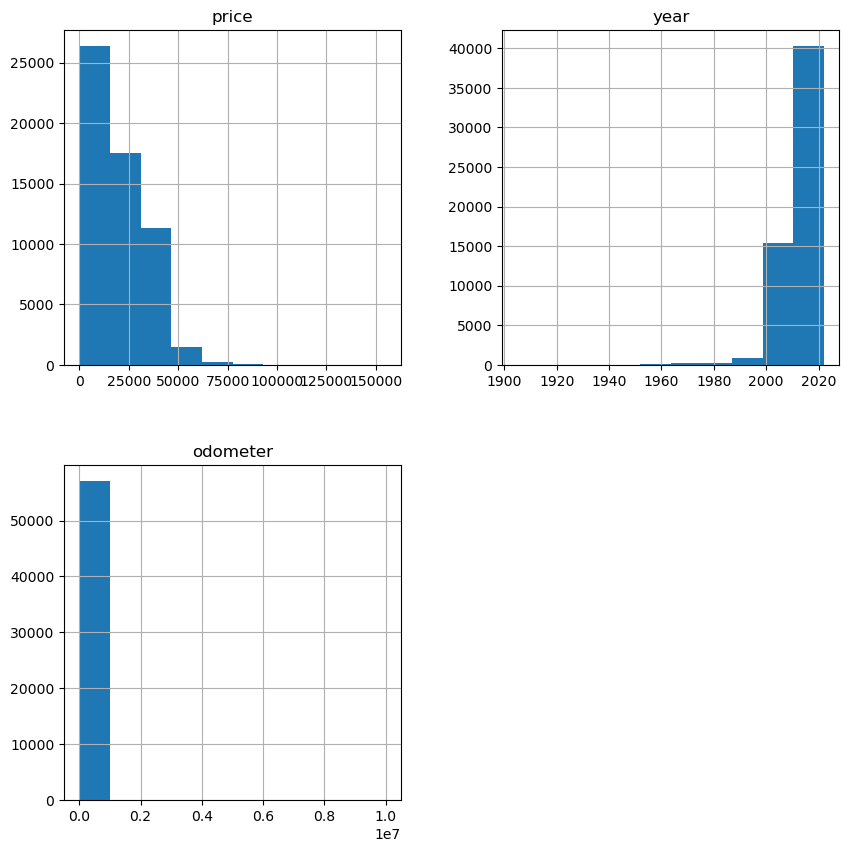

In [2345]:
# Generate histograms for price, year and odometer
data_clean[['price', 'year', 'odometer']].hist(figsize=(10,10))

As shown on the histograms, the distribution of the price data is skewed to the right while the distribution of the year is skewed to the left. The distribution of the odometer suggests the presence of outliers to the right of the mean. Therefore, we'll explore further. 

In [2346]:
# Geberate summarized statistics for the data_clean dataframe
data_clean.describe()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
count,57036.000000,57036.000000,57036.000000,57036.00000,57036.000000,57036.000000,5.703600e+04,57036.000000,57036.000000,57036.000000,57036.000000,57036.000000
mean,20401.602654,2012.229031,23.133723,2.58293,6.042236,1.223543,9.156290e+04,3.973227,1.161109,1.133793,6.109071,7.379725
std,13539.720133,6.716247,8.759674,0.66194,1.607411,0.775036,9.719127e+04,0.211948,0.469656,0.862615,3.684256,3.506924
min,3.000000,1905.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8995.000000,2010.000000,17.000000,2.00000,4.000000,1.000000,3.856175e+04,4.000000,1.000000,0.000000,2.000000,4.000000
50%,16995.000000,2013.000000,28.000000,3.00000,6.000000,1.000000,8.739800e+04,4.000000,1.000000,1.000000,5.000000,9.000000
75%,29990.000000,2017.000000,29.000000,3.00000,8.000000,1.000000,1.300000e+05,4.000000,1.000000,2.000000,10.000000,11.000000
max,155000.000000,2022.000000,40.000000,5.00000,12.000000,4.000000,9.999999e+06,5.000000,2.000000,2.000000,12.000000,11.000000


As suspected, the max value for the odometer is significatly higher than the mean the value of the 75% quantile. Thefore, we will remove the top 1% to see if we can remove the outlier. 

In [2347]:
# Remove outliers above the 99 percentile
data_clean = data_clean[data_clean["odometer"] < data_clean["odometer"].quantile(0.99)]

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'odometer'}>, <Axes: >]], dtype=object)

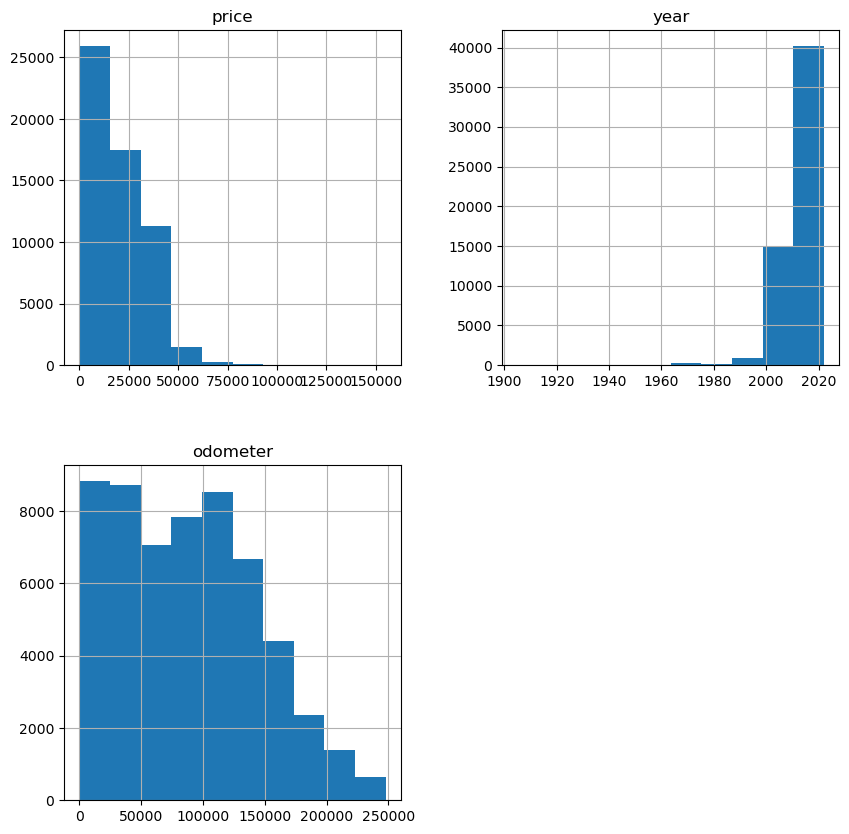

In [2348]:
# Generate histogram to verify results
data_clean[['price', 'year', 'odometer']].hist(figsize=(10,10))

We will use the data standarization method to center the data around the mean:

In [2349]:
# Create dataframe with the standarize data 
data_clean_standarized = (data_clean - data_clean.mean()) / data_clean.std()

# Verify results
data_clean_standarized.describe()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
count,5.646500e+04,5.646500e+04,5.646500e+04,5.646500e+04,5.646500e+04,5.646500e+04,5.646500e+04,5.646500e+04,5.646500e+04,5.646500e+04,5.646500e+04,5.646500e+04
mean,-3.422786e-17,7.647914e-15,1.197975e-16,-1.092271e-16,-6.996578e-17,-2.969770e-17,-6.140881e-17,-6.022594e-16,-2.718095e-16,-6.040211e-17,-5.033509e-19,1.963069e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.515114e+00,-1.607720e+01,-2.638960e+00,-3.912605e+00,-3.756386e+00,-1.590888e+00,-1.574651e+00,-1.872451e+01,-2.472311e+00,-1.310940e+00,-1.656050e+00,-2.105336e+00
25%,-8.508096e-01,-3.447574e-01,-6.988398e-01,-8.854232e-01,-1.266972e+00,-2.850749e-01,-8.940547e-01,1.266145e-01,-3.472895e-01,-1.310940e+00,-1.113475e+00,-9.643456e-01
50%,-2.594222e-01,1.047410e-01,5.565320e-01,6.281677e-01,-2.226431e-02,-2.850749e-01,-4.070451e-02,1.266145e-01,-3.472895e-01,-1.525508e-01,-2.996107e-01,4.618925e-01
75%,7.002433e-01,7.040722e-01,6.706568e-01,6.281677e-01,1.222443e+00,-2.850749e-01,7.076281e-01,1.266145e-01,-3.472895e-01,1.005838e+00,1.056829e+00,1.032388e+00
max,9.935638e+00,1.453236e+00,1.926029e+00,3.655349e+00,3.711858e+00,3.632363e+00,2.832639e+00,4.839395e+00,1.777732e+00,1.005838e+00,1.599405e+00,1.032388e+00


Now we proceed with the removal of outliers for the price, year and odometer features using the Standard Deviation method. We will use 3 standard deviations (99.7% of the data):

Text(0.5, 1.0, 'price (standarized)')

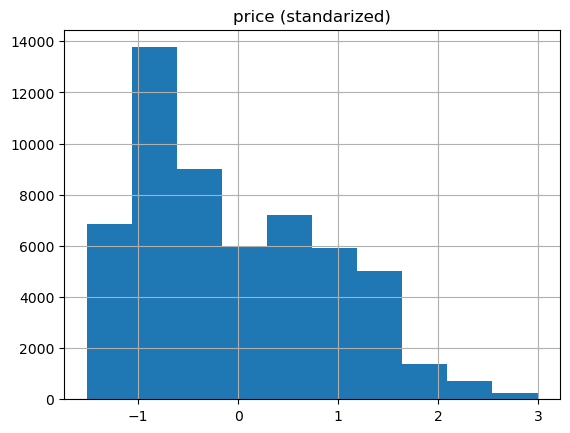

In [2350]:
# Set price mean and std variable
price_mean = data_clean_standarized['price'].mean()
price_std = data_clean_standarized['price'].std()

# Calculate lower and upper cut off points (using 3 standard deviations )  
price_upper = price_mean + price_std * 3
price_lower = price_mean - price_std * 3

# Remove outliers by filtering out the values outside of the lower and upper cut off points  
data_clean_standarized = data_clean_standarized.query('price > @price_lower & price < @price_upper')
data_clean_standarized['price'].hist().set_title("price (standarized)")

Text(0.5, 1.0, 'year (standarized)')

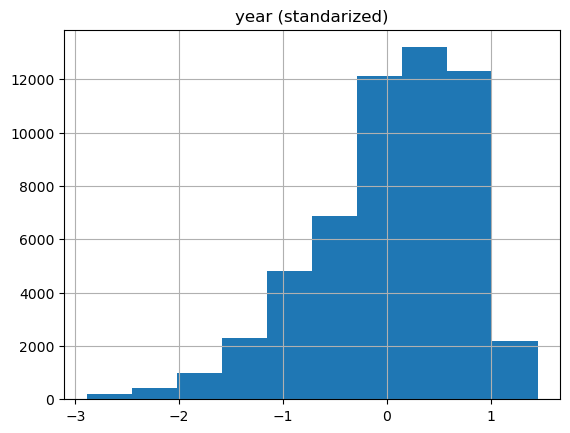

In [2351]:
# Set year mean and std variable
year_mean = data_clean_standarized['year'].mean()
year_std = data_clean_standarized['year'].std()

# Calculate lower and upper cut off points (using 3 standard deviations )  
year_upper = year_mean + year_std * 3
year_lower = year_mean - year_std * 3

# Remove outliers by filtering out the values outside of the lower and upper cut off points  
data_clean_standarized = data_clean_standarized.query('year > @year_lower & year < @year_upper')
data_clean_standarized['year'].hist().set_title("year (standarized)")

Text(0.5, 1.0, 'odometer (standarized)')

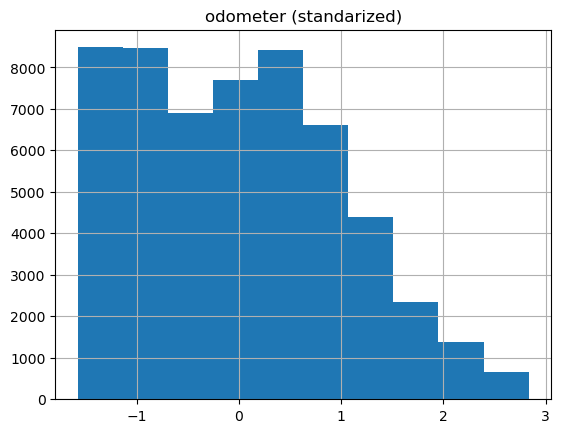

In [2352]:
# Set year mean and std variable
odometer_mean = data_clean_standarized['odometer'].mean()
odometer_std = data_clean_standarized['odometer'].std()

# Calculate lower and upper cut off points (using 3 standard deviations )  
odometer_upper = odometer_mean + odometer_std * 3
odometer_lower = odometer_mean - odometer_std * 3

# Remove outliers by filtering out the values outside of the lower and upper cut off points  
data_clean_standarized = data_clean_standarized.query('odometer > @odometer_lower & odometer < @odometer_upper')
data_clean_standarized['odometer'].hist().set_title("odometer (standarized)")

In [2353]:
# Verify removal of outliers
data_clean_standarized.describe()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
count,55362.000000,55362.000000,55362.000000,55362.000000,55362.000000,55362.000000,55362.000000,55362.000000,55362.000000,55362.000000,55362.000000,55362.000000
mean,-0.024620,0.065963,-0.006077,-0.003903,-0.013069,-0.008354,0.010944,0.001734,0.014404,-0.003928,-0.009628,-0.000449
std,0.936139,0.748993,0.999948,0.993140,0.994788,0.985961,0.999232,0.980051,0.994418,1.004823,1.000479,0.999499
min,-1.515114,-2.891915,-2.638960,-3.912605,-3.756386,-1.590888,-1.574651,-18.724507,-2.472311,-1.310940,-1.656050,-2.105336
25%,-0.850810,-0.344757,-0.927089,-0.885423,-1.266972,-0.285075,-0.882979,0.126615,-0.347290,-1.310940,-1.113475,-0.964346
50%,-0.259496,0.254574,0.556532,0.628168,-0.022264,-0.285075,-0.022268,0.126615,-0.347290,-0.152551,-0.299611,0.461893
75%,0.700243,0.704072,0.670657,0.628168,1.222443,-0.285075,0.718775,0.126615,-0.347290,1.005838,1.056829,1.032388
max,2.991177,1.453236,1.811904,3.655349,3.711858,3.632363,2.832639,4.839395,1.777732,1.005838,1.599405,1.032388


In [2354]:
# Revert standarized data (without outliers) to verify 
data_clean_reverted = (data_clean_standarized * data_clean.std()) + data_clean.mean()

# Generate sumarized stats
data_clean_reverted.describe()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
count,55362.000000,55362.000000,5.536200e+04,55362.000000,55362.000000,55362.000000,55362.000000,55362.000000,55362.000000,55362.000000,55362.000000,55362.000000
mean,20178.281077,2012.741194,2.307023e+01,2.582403,6.014775,1.211914,89186.126675,3.973502,1.170207,1.128301,6.068910,7.379159
std,12671.544433,4.998856,8.761887e+00,0.656148,1.598429,0.755056,56204.544237,0.207956,0.467957,0.867431,3.687888,3.503971
min,3.000000,1993.000000,-3.552714e-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8995.000000,2010.000000,1.500000e+01,2.000000,4.000000,1.000000,38905.000000,4.000000,1.000000,0.000000,2.000000,4.000000
50%,16999.000000,2014.000000,2.800000e+01,3.000000,6.000000,1.000000,87318.000000,4.000000,1.000000,1.000000,5.000000,9.000000
75%,29990.000000,2017.000000,2.900000e+01,3.000000,8.000000,1.000000,129000.000000,4.000000,1.000000,2.000000,10.000000,11.000000
max,61000.000000,2022.000000,3.900000e+01,5.000000,12.000000,4.000000,247900.000000,5.000000,2.000000,2.000000,12.000000,11.000000


As shown on the summarized statistics after revering the standaraized data, the outliers have been removed and the data is centered around the mean.   

Next, we're going to use a heat map using Seaborn to help us visualize the correlation between the features:

<Axes: >

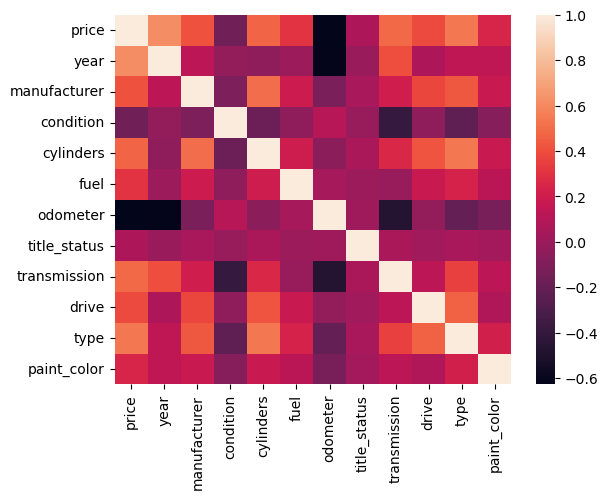

In [2355]:
# Generate heat map of feature correlations with price
sns.heatmap(data_clean_standarized.corr())

Text(0.5, 0, 'correlation')

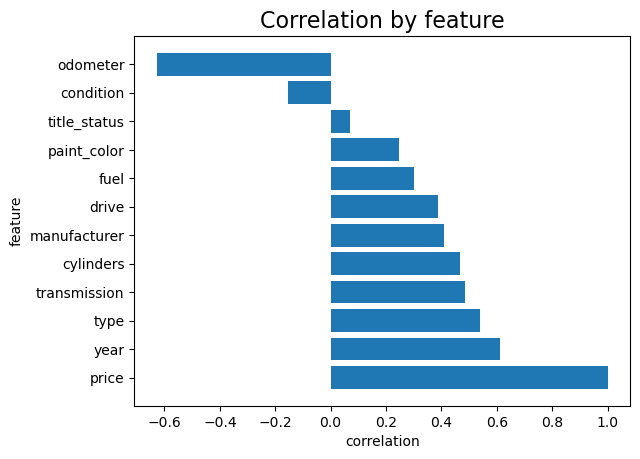

In [2356]:
# Determine correlation with price 
price_correlations = data_clean_standarized.corr()['price'].sort_values(ascending=False)

# Generate horizontal bar plot with correlations  
plt.barh(width=price_correlations.values, y=price_correlations.index)
plt.title("Correlation by feature", fontsize="16")
plt.ylabel("feature")
plt.xlabel("correlation")


Now we're going to generate a scatter plot for the year (highest correlation feature) and the price to try to understand the shape of the correlation of these two features:

Text(0.5, 0, 'year')

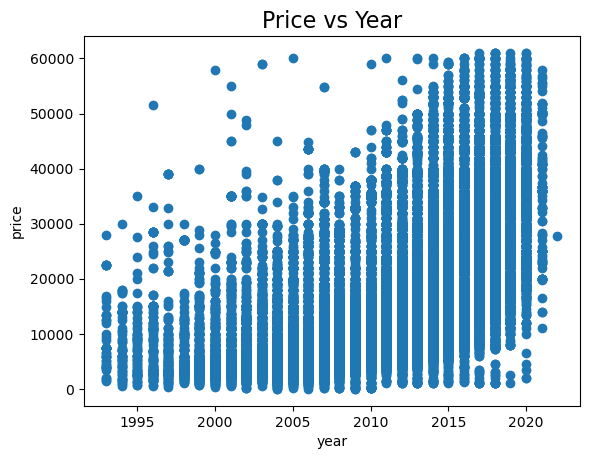

In [2357]:
# Generate scatter plot of year vs price
plt.scatter(x=data_clean_reverted['year'], y=data_clean_reverted['price'])
plt.title("Price vs Year", fontsize="16")
plt.ylabel("price")
plt.xlabel("year")

As shown on the chart, there's no clear linearity in the correlation between price and year.

We'll proceed to generate a scatter plot of the odometer and price since they have the lowest (negative) correlation: 

Text(0.5, 0, 'odometer')

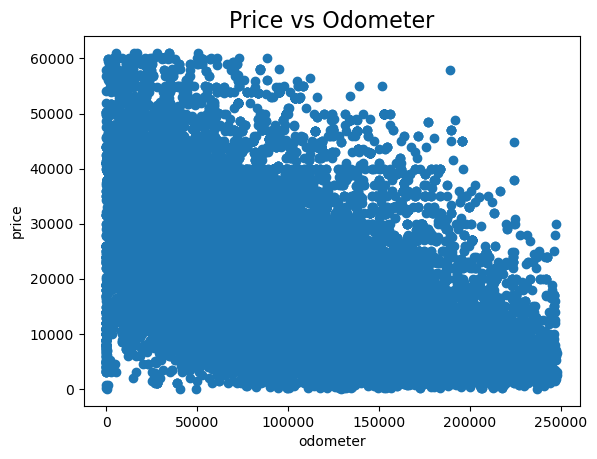

In [2358]:
# Genarate scatter plot of price vs odometer
plt.scatter(x=data_clean_reverted['odometer'], y=data_clean_reverted['price'])
plt.title("Price vs Odometer", fontsize="16")
plt.ylabel("price")
plt.xlabel("odometer")

As shown on the chart, there's no clear linearity in the correlation between price and year.

### Modeling

<i>With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.</i>

--------

We first proceed to import the Sklearn libraries we'll be using for the modeling phase:

In [2359]:
# Imports
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.compose import TransformedTargetRegressor
from random import shuffle, seed


Next, we'll split the data into Test and Train for cross-validation. Notice we will use both the "reverted" (non-standarized) data as well as the standarized data:

In [2365]:
# Set X and y from the "reverted" (non standarized) data:
X = data_clean_reverted.drop('price', axis=1)
y = data_clean_reverted['price'] 

# Split non-standarized data using randomization and a .3 ratio for test data size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set X and y from the standarized data:
Xs = data_clean_standarized.drop('price', axis=1)
ys = data_clean_standarized['price'] 

# Split standarized data using randomization and a .3 ratio for test data size
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.3, random_state=42)

# Verify shape
print(X_train.shape, y_train.shape)
print(Xs_train.shape, ys_train.shape)

(38753, 11) (38753,)
(38753, 11) (38753,)


Next, we will determine the feature importance by fitting a permutation_importance model. For this will use the standarized data so that the model can factor all features equally:

Text(0.5, 0, 'Feature')

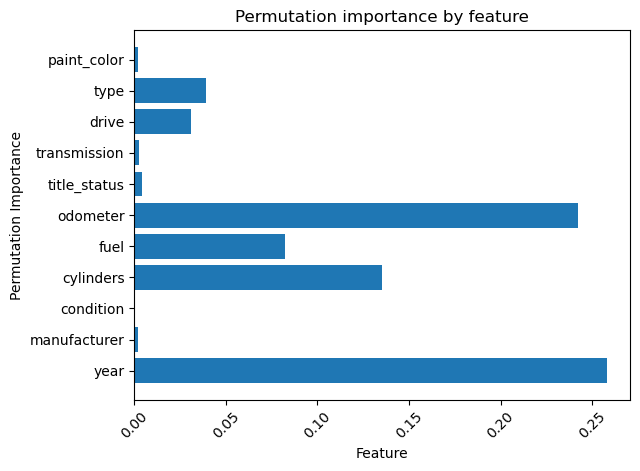

In [2366]:
# Instantiate linear regresion model
model = LinearRegression().fit(Xs_train, ys_train)

# Inspect data and calculate permutation importance (using standarized data) 
result = permutation_importance(model, Xs_train, ys_train, n_repeats=10,random_state=0)

# Genarate horizontal barchart to visualize results
plt.barh(y=Xs_train.columns.values, width=result.importances_mean)
plt.xticks(rotation=45)
plt.title("Permutation importance by feature")
plt.ylabel("Permutation Importance")
plt.xlabel("Feature")

As shown on the chart the year, odometer and type are the three most important features, followed by cylinders, fuel and drive. Therefore, we will focus on the top 6 most important features from this point on.

In [2409]:
# Create permutation importance dataframe
permutation_importance_df = pd.DataFrame(result.importances_mean, columns=['permutation_importance'], index=Xs_train.columns.values).sort_values(by='permutation_importance', ascending=False)

# Set Most important features list
permutation_importance_list = list(permutation_importance_df.index)[0:6]

# Update train and test data so that they only contain the most important features selected 
X_train = X_train[permutation_importance_list]
X_test = X_test[permutation_importance_list]

Xs_train = Xs_train[permutation_importance_list]
Xs_test = Xs_test[permutation_importance_list]

On the next section we're going to use different modeling techniques together with cross validation on the train and test data with the goal of finding the model with lowest mean squarred error. 

In [2410]:
# Create variable to store results from modeling
modeling_results = []

#### Model #1: Linear Model using "year" and expanded with polynomial features
Next, we're going to use a Pipeline with a PolynomialFeatures preprocessor and a LinearRegression model using only the year feature. We'll iterate 9 times with the goal to determine how many degrees should be used on the by the PolynomialFeature to expand the "year" feature.  


In [2411]:
# Create train and test mses array to store the results of the iterations
train_mses = []
test_mses = []

# Set the features to be used
features = ['year']

# Loop over 9 iterations
for i in range(1, 10):  
    # Instantiate the pipeline and use the iteration number to set the degree of the polynomial feature processor
    pipe = Pipeline([
        ('features', PolynomialFeatures(degree=i, include_bias=False)),
        ('linreg', LinearRegression())
    ])

    # Train the model using the unscaled data
    pipe.fit(X_train[features], y_train)
        
    #Calculate mse for train and test data
    train_mse = mean_squared_error(pipe.predict(X_train[features]), y_train)
    test_mse = mean_squared_error(pipe.predict(X_test[features]), y_test)
    
    # Store mses on their respective arrays
    train_mses.append(train_mse)
    test_mses.append(test_mse)    

# Print results 
print(train_mses)
print(test_mses)

[99960615.43751986, 90734607.61014038, 90670605.05349238, 90671071.2588144, 90671523.44327988, 90671961.52135399, 90672385.39503409, 90672794.97665499, 90673190.1811025]
[101216833.34601083, 92287623.6635521, 92214100.49479556, 92214493.28494711, 92214872.34793653, 92215244.07306941, 92215605.90351875, 92215957.41452911, 92216299.7064737]


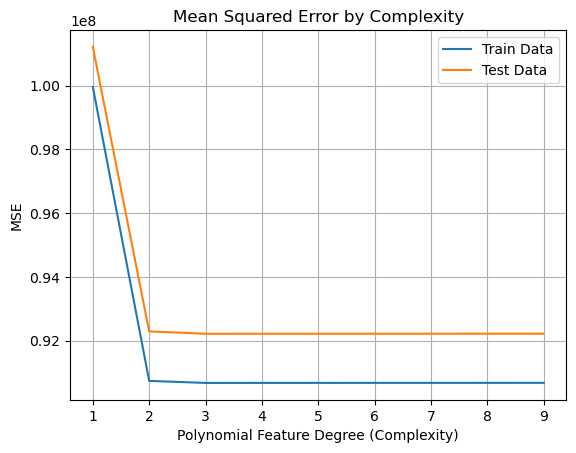

In [2412]:
# Create line chart with the train and test mses 
plt.plot(list(range(1,10)), train_mses, label="Train Data")
plt.plot(list(range(1,10)), test_mses, label="Test Data")
plt.title("Mean Squared Error by Complexity")
plt.xlabel("Polynomial Feature Degree (Complexity)")
plt.legend()
plt.ylabel("MSE")
plt.grid()

As show on the chart above, the model does not seem improve much above two degrees.

In [2413]:
# Store results 
modeling_results.append([
    'Model 1',
    'Linear Model using "year" and expanded with polynomial features',
    train_mses[1],
    test_mses[1]
])

# Verify storing of results
print(modeling_results[-1])

['Model 1', 'Linear Model using "year" and expanded with polynomial features', 90734607.61014038, 92287623.6635521]


#### Model #2:  Linear Model using "year" and "odometer" and expanded with polynomial features
Next, we're going to apply a similar pipeline, but this time using both the "year" and "odometer" features:

In [2414]:
# Create train and test mses array to store the results of the iterations
train_mses = []
test_mses = []

# Set the features to be used
features = ['year', 'odometer']

# Loop over 9 iterations
for i in range(1, 10):  
    # Instantiate the pipeline and use the iteration number to set the degree of the polynomial feature processor
    pipe = Pipeline([
        ('features', PolynomialFeatures(degree=i, include_bias=False)),
        ('linreg', LinearRegression())
    ])

    # Train the model using the unscaled data
    pipe.fit(X_train[features], y_train)
        
    #Calculate mse for train and test data
    train_mse = mean_squared_error(pipe.predict(X_train[features]), y_train)
    test_mse = mean_squared_error(pipe.predict(X_test[features]), y_test)
    
    # Store mses on their respective arrays
    train_mses.append(train_mse)
    test_mses.append(test_mse)    

# Print results 
print(train_mses)
print(test_mses)

[83757381.06511739, 77449705.91309471, 77305578.17305273, 76151414.23700418, 77661138.94709334, 77877245.74717218, 77907969.4689465, 82792476.65094765, 84089545.1887203]
[85289163.56254911, 79063934.97945178, 78938765.72575058, 77664961.64712094, 79097311.37702866, 79405898.74907918, 79416479.19119668, 84140559.37923364, 85482559.41937815]


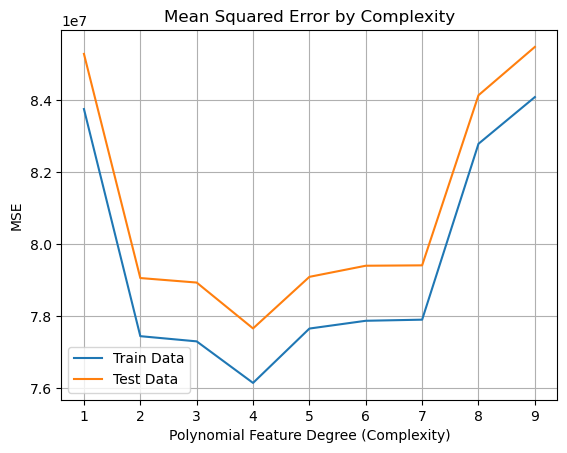

In [2415]:
# Create line chart with the train and test mses 
plt.plot(list(range(1,10)), train_mses, label="Train Data")
plt.plot(list(range(1,10)), test_mses, label="Test Data")
plt.title("Mean Squared Error by Complexity")
plt.xlabel("Polynomial Feature Degree (Complexity)")
plt.legend()
plt.ylabel("MSE")
plt.grid()

As show on the chart above, "4" seems to be the optimal degree for this model. Beyond degree it is clearly overfitted. 

In [2416]:
# Store results 
modeling_results.append([
    'Model 2',
    'Linear Model using "year" and "odometer" and expanded with polynomial features',
    train_mses[2],
    test_mses[2]
])

# Verify storing of results
print(modeling_results[-1])

['Model 2', 'Linear Model using "year" and "odometer" and expanded with polynomial features', 77305578.17305273, 78938765.72575058]


#### Model #3:  Linear Model using "year", "odometer" and "type" and expanded with polynomial features
Next, we're going to apply a similar pipeline, but this time using both the "year", "odometer" and "type" features:

In [2417]:
# Create train and test mses array to store the results of the iterations
train_mses = []
test_mses = []

# Set the features to be used
features = ['year', 'odometer', 'type']

# Loop over 9 iterations
for i in range(1, 10):  
    # Instantiate the pipeline and use the iteration number to set the degree of the polynomial feature processor
    pipe = Pipeline([
        ('features', PolynomialFeatures(degree=i, include_bias=False)),
        ('linreg', LinearRegression())
    ])

    # Train the model using the unscaled data
    pipe.fit(X_train[features], y_train)
        
    #Calculate mse for train and test data
    train_mse = mean_squared_error(pipe.predict(X_train[features]), y_train)
    test_mse = mean_squared_error(pipe.predict(X_test[features]), y_test)
    
    # Store mses on their respective arrays
    train_mses.append(train_mse)
    test_mses.append(test_mse)    

# Print results 
print(train_mses)
print(test_mses)

[56092556.78672158, 52884409.56865256, 49688356.13777276, 49441730.37924484, 50605245.049407355, 51569139.09674973, 53623067.42782719, 88939199.89908452, 98272897.1029141]
[56682549.88943109, 53656285.21564275, 50595128.52174107, 50287452.66343533, 51320102.123507515, 52198676.76315224, 54467005.23482721, 87242851.15068132, 97916149.94874354]


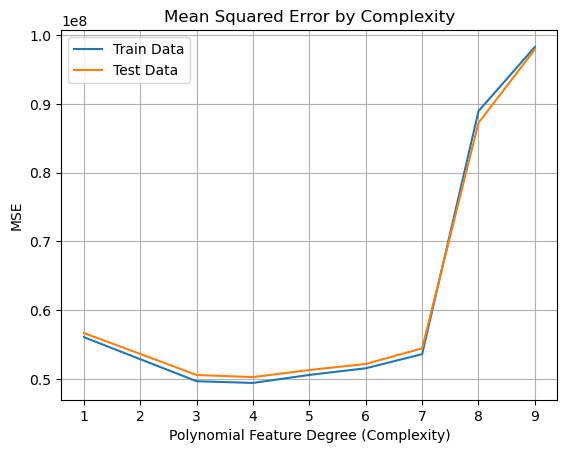

In [2418]:
plt.plot(list(range(1,10)), train_mses, label="Train Data")
plt.plot(list(range(1,10)), test_mses, label="Test Data")
plt.title("Mean Squared Error by Complexity")
plt.xlabel("Polynomial Feature Degree (Complexity)")
plt.legend()
plt.ylabel("MSE")
plt.grid()

As show on the chart above, "4" seems to be the optimal degree for this model. After degree 7 the model is clearly overfitted.

In [2419]:
# Store results 
modeling_results.append([
    'Model 3',
    'Linear Model using "year", "odometer" and "type" and expanded with polynomial features',
    train_mses[2],
    test_mses[2]
])

# Verify storing of results
print(modeling_results[-1])

['Model 3', 'Linear Model using "year", "odometer" and "type" and expanded with polynomial features', 49688356.13777276, 50595128.52174107]


#### Model #4:  Ridge Model all features
Next, we're going to use a ridge model using all the numerical features on the test and train data (unscaled). 

In [2420]:
# Instantiate Ridge model
ridge_reg = Ridge()

# Fit train data 
ridge_reg.fit(X_train, y_train)

# Calculate mse for both train and test data
ridge_reg_train_mse = mean_squared_error(ridge_reg.predict(X_train), y_train)
ridge_reg_test_mse = mean_squared_error(ridge_reg.predict(X_test), y_test)

# Store results
modeling_results.append([
    'Model 4',
    'Ridge Model all features (unscaled)',
    ridge_reg_train_mse,
    ridge_reg_test_mse
])

# Verify storing of results
print(modeling_results[-1])

['Model 4', 'Ridge Model all features (unscaled)', 35522062.26067681, 35942181.88102385]


In [2421]:
#Store model 4 coefficients in dataframe for later evaluation
model4_coef_df = pd.DataFrame(
    ridge_reg.coef_, 
    index=X_train.columns,
    columns=['coef']
)

#### Model #5:  Linear Regresion Model using all features and expanded with polynomial features (2 degrees)
Next, we're going to use a linear regresion model through a pipeline using all the numerical features on the test and train data (unscaled) and expanded by two polynomial degrees: 

In [2422]:
# Instantiate pipeline using a polynomial preprocessor to expand to two degrees and a linear regression model
quad_pipe = Pipeline([
    ('quad_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('quad_model', LinearRegression())
])

# Train model
quad_pipe.fit(X_train, y_train)

# Calculate mse for train and test data
quad_pipe_train_mse = mean_squared_error(quad_pipe.predict(X_train), y_train)
quad_pipe_test_mse = mean_squared_error(quad_pipe.predict(X_test), y_test)

# Store results
modeling_results.append([
    'Model 5',
    'Linear Regresion Model using all features and expanded with polynomial features (2 degrees)',
    quad_pipe_train_mse,
    quad_pipe_test_mse
])

# Verify storing of results
print(modeling_results[-1])

['Model 5', 'Linear Regresion Model using all features and expanded with polynomial features (2 degrees)', 29222085.010562375, 29725617.954316963]


In [2423]:
#Store model 5 coefficients in dataframe for later evaluation
model5_coef_df = pd.DataFrame(
    quad_pipe.named_steps['quad_model'].coef_, 
    index=quad_pipe.named_steps['quad_features'].get_feature_names_out(),
    columns=['coef']
)

#### Model #6:  Linear Regresion Model using all features and expanded with polynomial features (3 degrees)
Next, we're going to use a linear regresion model through a pipeline using all the numerical features on the test and train data (unscaled) and expanded by three polynomial degrees: 

In [2424]:
# Instantiate pipeline using a polynomial preprocessor to expand to three degrees and a linear regression model
cubic_pipe = Pipeline([
    ('cubic_features', PolynomialFeatures(degree=3, include_bias=False)),
    ('cubic_model', LinearRegression())
])

# Train model
cubic_pipe.fit(X_train, y_train)

# Calculate mse for train and test data
cubic_pipe_train_mse = mean_squared_error(cubic_pipe.predict(X_train), y_train)
cubic_pipe_test_mse = mean_squared_error(cubic_pipe.predict(X_test), y_test)


# Store results
modeling_results.append([
    'Model 6',
    'Linear Regresion Model using all features and expanded with polynomial features (3 degrees)',
    cubic_pipe_train_mse,
    cubic_pipe_test_mse
])

# Verify storing of results
print(modeling_results[-1])

['Model 6', 'Linear Regresion Model using all features and expanded with polynomial features (3 degrees)', 26644530.6401408, 27077147.318807587]


In [2425]:
#Store model 6 coefficients in dataframe for later evaluation
model6_coef_df = pd.DataFrame(
    cubic_pipe.named_steps['cubic_model'].coef_, 
    index=cubic_pipe.named_steps['cubic_features'].get_feature_names_out(),
    columns=['coef']
)

#### Model #7:  GridSearchCV SequentialFeatureSelection/Linear regression estimator
Next, we're going to use the GridSeachCV model selector on a with pipeline with sequential feature selector (5 features) using a linear regresion model:

In [2426]:
# Instantiate pipeline usina SequentialFeatureSelection/Linear regression estimator
selector_pipe = Pipeline([
    ('selector', SequentialFeatureSelector(LinearRegression())),
    ('model', LinearRegression())
])

# Set dictionary for number of features (sequential feature selector) 
param_dict = {'selector__n_features_to_select' : [1,2,3,4,5]}

# Instantite selector grid
selector_grid = GridSearchCV(
    estimator=selector_pipe,
    param_grid=param_dict
)

# Fit model
selector_grid.fit(X_train, y_train)

# Culculate mse for train and test data
selector_train_mse = mean_squared_error(selector_grid.best_estimator_.predict(X_train), y_train)
selector_test_mse = mean_squared_error(selector_grid.best_estimator_.predict(X_test), y_test)

# Store results
modeling_results.append([
    'Model 7',
    'GridSearchCV SequentialFeatureSelection/Linear regression estimator',
    selector_train_mse,
    selector_test_mse
])

# Verify storing of results
print(modeling_results[-1])


['Model 7', 'GridSearchCV SequentialFeatureSelection/Linear regression estimator', 37371248.34945976, 37660187.310724854]


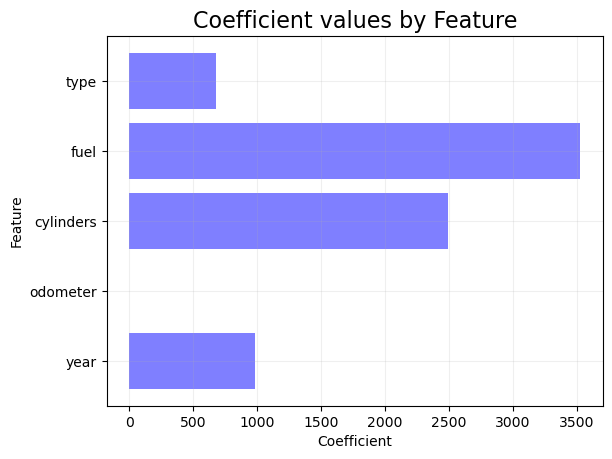

<Figure size 20000x20000 with 0 Axes>

In [2427]:
# Generate bar plot to visualize the coefficient values calculated by the best estimator for each feature 
width = selector_grid.best_estimator_.named_steps['model'].coef_
columns = X_train.columns[selector_grid.best_estimator_.named_steps['selector'].get_support()]
coef_df = pd.DataFrame({'coef' : width}, columns)
coef_df['coef'].sort_values(ascending=False)
plt.barh(width=coef_df['coef'], y=columns, color='blue', alpha=0.5)
plt.xlabel("Coefficient", fontsize=10)   
plt.ylabel("Feature")   
plt.title("Coefficient values by Feature", fontsize=16)
plt.grid(alpha=0.2)
plt.figure(figsize=(200,200))
plt.show()


#### Model #8:  GridSearchCV using Scaler and a Ridge regression model
Next, we're going to use the GridSeachCV model selector on a with pipeline with a standard scaler and a ridge regresion model:

In [2428]:
# Set dictionary for ridge model parameter (to control regularization strength)
ridge_param_dict = {'ridge__alpha' : np.logspace(0, 10, 50)}
ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Instantiate ridge GridSearch model
ridge_grid = GridSearchCV(
    estimator=ridge_pipe,
    param_grid=ridge_param_dict
)

# Fit model                    
ridge_grid.fit(X_train, y_train)

# Calculate mse for train and test data
ridge_train_mse = mean_squared_error(ridge_grid.best_estimator_.predict(X_train), y_train)
ridge_test_mse = mean_squared_error(ridge_grid.best_estimator_.predict(X_test), y_test)

# Store results
modeling_results.append([
    'Model 8',
    'GridSearchCV using Scaler and a Ridge regression model',
    ridge_train_mse,
    ridge_test_mse
])

# Verify storing of results
print(modeling_results[-1])

['Model 8', 'GridSearchCV using Scaler and a Ridge regression model', 35522070.78256628, 35941880.73552451]


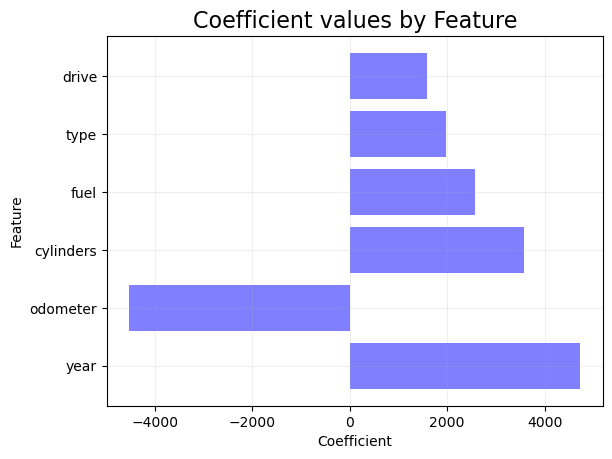

<Figure size 20000x20000 with 0 Axes>

In [2429]:
# Generate bar plot to visualize the coefficient values calculated by the best estimator for each feature 
width = ridge_grid.best_estimator_.named_steps['ridge'].coef_
coef_df = pd.DataFrame({'coef' : ridge_grid.best_estimator_.named_steps['ridge'].coef_}, X_train.columns)
coef_df['coef'].sort_values(ascending=False)
plt.barh(width=coef_df['coef'], y=X_train.columns, color='blue', alpha=0.5)
plt.xlabel("Coefficient", fontsize=10)   
plt.ylabel("Feature")   
plt.title("Coefficient values by Feature", fontsize=16)
plt.grid(alpha=0.2)
plt.figure(figsize=(200,200))
plt.show()

In [2430]:
# Store model 8 coeffficients for later evaluation
model8_coef_df = pd.DataFrame(coef_df['coef'])

#### Model #9:  Transformed Target Regressor using linear regression model
Lastly, we're going to use the Transformed Target Regressor using a linear regression model:

In [2432]:
# Instantiate Transformed Target Regressor
tt = TransformedTargetRegressor(regressor=LinearRegression(), func=np.log, inverse_func=np.exp)

# Fit model
tt.fit(X_train, y_train)

# Calculate mse
tt_train_mse = mean_squared_error(tt.predict(X_train), y_train)
tt_test_mse = mean_squared_error(tt.predict(X_test), y_test)

# Store results
modeling_results.append([
    'Model 9',
    'Transformed Target Regressor using linear regression model',
    tt_train_mse,
    tt_test_mse
])

# Verify storing of results
print(modeling_results[-1])


['Model 9', 'Transformed Target Regressor using linear regression model', 43441714.2477993, 44547726.2633706]


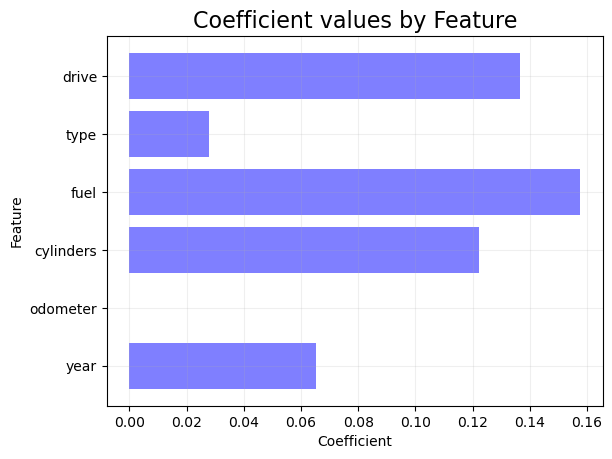

<Figure size 20000x20000 with 0 Axes>

In [2433]:
# Generate bar plot to visualize the coefficient values calculated by the regressor
width = tt.regressor_.coef_
model9_coef_df = pd.DataFrame({'coef' : width}, X_train.columns)
model9_coef_df['coef'].sort_values(ascending=False)
plt.barh(width=model9_coef_df['coef'], y=X_train.columns, color='blue', alpha=0.5)
plt.xlabel("Coefficient", fontsize=10)   
plt.ylabel("Feature")   
plt.title("Coefficient values by Feature", fontsize=16)
plt.grid(alpha=0.2)
plt.figure(figsize=(200,200))
plt.show()


### Evaluation

<i>With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.</i>

To help evaluate the quality of our models, we will create a dataframe with the results obtained during the modeling phase:

<p><strong>IMPORTANT:</strong>
<i>During the initial data exploration we found that a significant number of entries (~40%) missing the size value (null). After dropping these entries it resulted in a significant data loss. However, during the first iteration of the evaluation phase we determined that the "size" feature is not a major factor when determining the price of used cars. Therefore, we performed another iteration where the size feature was dropped for all entries. This way we were able to work with a bigger dataset. </i></p>

In [2434]:
# Create dataframe using the modeling results and set the proper column names
results_df = pd.DataFrame(modeling_results, columns=['Name', 'Description', 'Train MSE', 'Test MSE'])

In [2435]:
results_df

,Name,Description,Train MSE,Test MSE
0,Model 1,"Linear Model using ""year"" and expanded with po...",9.073461e+07,9.228762e+07
1,Model 2,"Linear Model using ""year"" and ""odometer"" and e...",7.730558e+07,7.893877e+07
2,Model 3,"Linear Model using ""year"", ""odometer"" and ""typ...",4.968836e+07,5.059513e+07
3,Model 4,Ridge Model all features (unscaled),3.552206e+07,3.594218e+07
4,Model 5,Linear Regresion Model using all features and ...,2.922209e+07,2.972562e+07
5,Model 6,Linear Regresion Model using all features and ...,2.664453e+07,2.707715e+07
6,Model 7,GridSearchCV SequentialFeatureSelection/Linear...,3.737125e+07,3.766019e+07
7,Model 8,GridSearchCV using Scaler and a Ridge regressi...,3.552207e+07,3.594188e+07
8,Model 9,Transformed Target Regressor using linear regr...,4.344171e+07,4.454773e+07


Now by sorting the dataframe by the mean squared error of the test data (in ascending order) and using a horizontal bar plot we will be able to organize and visualize the models by their quality (least mean squared error): 

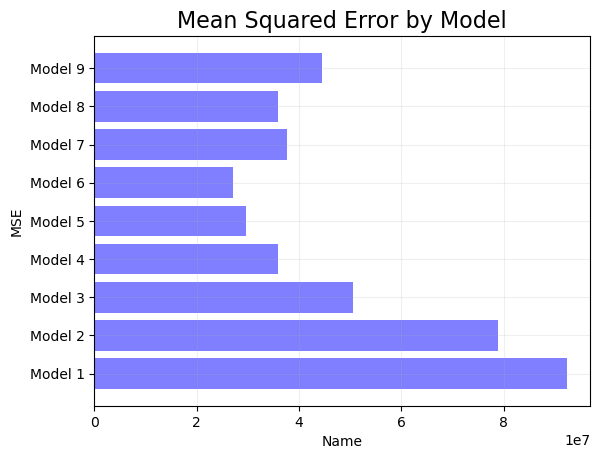

<Figure size 20000x20000 with 0 Axes>

In [2436]:
# Generate bar plot of the mean squared error by model 
plt.barh(width=results_df['Test MSE'], y=results_df['Name'], color='blue', alpha=0.5)
plt.xlabel("Name", fontsize=10)   
plt.ylabel("MSE")   
plt.title("Mean Squared Error by Model", fontsize=16)
plt.grid(alpha=0.2)
plt.figure(figsize=(200,200))
plt.show()

As it can be seen on the bar plot, the best performing model was model 6, which uses a pipeline with a linear regression model with polynomial feature processor on all features to expand to 3 degrees. This model used unscaled data. The next best model is model 5, which also uses a linear regression model with polynomial feature processor on all features to expand to 2 degrees. The thir best model is model 4, which uses a Ridge regression model fitted with unscaled data. 

For convenience the coefficients for these models are provided below: 

In [2437]:
# Display model 6 coefficients in descending order
model6_coef_df.sort_values(by='coef', ascending=False)

,coef
fuel^2 type,232.982298
year type,117.683961
cylinders fuel^2,76.385576
fuel^3,55.102150
fuel^2 drive,32.432598
...,...
fuel type^2,-66.807907
type drive^2,-68.603955
year cylinders,-79.619661
year fuel,-169.101499


In [2438]:
# Display model 5 coefficients in descending order
model5_coef_df.sort_values(by='coef', ascending=False)

,coef
type,6.814115e+04
fuel^2,1.944930e+03
fuel drive,6.897961e+02
year drive,1.684906e+02
year fuel,1.085830e+02
year cylinders,9.952283e+01
cylinders drive,9.918693e+01
fuel type,8.273404e+01
type drive,5.750359e+01
year^2,3.678900e+01


In [2439]:
# Display model 4 coefficients in descending order
model4_coef_df.sort_values(by='coef', ascending=False)


,coef
fuel,3433.829243
cylinders,2239.647498
drive,1828.978868
year,947.972089
type,537.719945
odometer,-0.080342


Based on the results obtained from the permutation importance and the coefficients obtained by the three top performing models we can conclude from this stage of the analysis that the top 5 features when determining the price of a used car are "fuel", "type", "year", "cylinders" and "drive". 

### Deployment

<i>Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.</i>

-----

As requested, we have performed a comprehensive analysis on the vehicle dataset provided, with the goal of identifying the most important features that determine the price of an used car. 

The dataset contained a total of 426,880 samples with 18 distinct features. However, during the data exploration phase of our analysis we found that several of these samples contained incomplete information. Therefore, to avoid compromising the quality of our results, we focused only the samples that contained complete data. Additionally, we decided to exclude certain fields such as id and VIN since we believe they are not correlated with the price of an used car. Moreover, there were fields such as region and car model that we also decided to exclude, mainly because their structure was too fragmented. Lastly, we also decided exclude the  "state" to limit the scope of the problem.

Once we completed the data exploration and preparation phases, we proceeded to the modeling phase. In this phase we split the data into two groups called "Train" and "Test" respectively. Then, we applied several machine learning techniques over several iterations that used different combination of features to predict the price. These processed resulted in 9 trained models. Then, we evaluated the quality of these models using a cross validation technique where we compared the difference between the actual data and the data predicted by the model. From these 9 models we chose the top three performing models and compared the most important features they use for the estimation of price. 

Based on the results of the top three selected models and after finding the common features between them, we concluded that the the most relevant features when determining the price of used cars are "fuel", "type", "year", "cylinders" and "drive". Therefore, we decided to compile a list of what we consider the top 1000 most valuable cars on the vehicle dataset:

In [2504]:
# Sort data_clean dataframe using the most relevant features and select the indexes of the top 1000 entries
most_valuable_cars_indexes = data_clean.sort_values(by=['price', 'fuel', 'type', 'year', 'cylinders', 'drive'], ascending=False)[0:1000].index

# Generate dataframe of most valuable cars
most_valuable_cars_df = data.iloc[most_valuable_cars_indexes]

# Visualize dataset
most_valuable_cars_df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
323687,7316503197,portland,155000,2020.0,mercedes-benz,benz sprinter,new,6 cylinders,diesel,250.0,clean,automatic,W1W4EBVY6LT035971,4wd,full-size,van,blue,or
91502,7310531509,delaware,150000,2009.0,ford,escape,good,4 cylinders,gas,182415.0,clean,automatic,1FMCU03789KA32590,fwd,full-size,SUV,custom,de
368720,7316942640,dallas / fort worth,144832,2013.0,volvo,s60,good,5 cylinders,gas,144832.0,clean,automatic,YV1612FS1D2207688,rwd,mid-size,sedan,black,tx
111853,7316265511,south florida,135000,2018.0,dodge,challenger srt demon,like new,8 cylinders,gas,1588.0,clean,automatic,2C3CDZH91JH100778,rwd,full-size,coupe,red,fl
234446,7308019982,charlotte,129928,1995.0,porsche,928,excellent,8 cylinders,gas,10374.0,clean,automatic,WP0AA2925SS820115,rwd,mid-size,coupe,black,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57603,7314413897,san luis obispo,50995,2018.0,jeep,wrangler unlimited,good,6 cylinders,gas,35624.0,clean,automatic,1C4HJXFG1JW174445,4wd,NaN,wagon,white,ca
72367,7304217088,boulder,50990,2019.0,ford,f150 supercrew cab king,good,8 cylinders,other,27345.0,clean,other,1FTEW1E50KKC29882,4wd,NaN,pickup,white,co
383901,7304262687,tyler / east TX,50990,2019.0,ford,f150 supercrew cab king,good,8 cylinders,other,27345.0,clean,other,1FTEW1E50KKC29882,4wd,NaN,pickup,white,tx
25099,7303236375,chico,50990,2016.0,chevrolet,silverado 2500 hd crew,good,8 cylinders,other,56262.0,clean,other,1GC1KXEG2GF282176,4wd,NaN,pickup,black,ca


For your convenience, we have also created the following visualizations to help understand the data on the table:

Text(0.5, 0, 'avg. price')

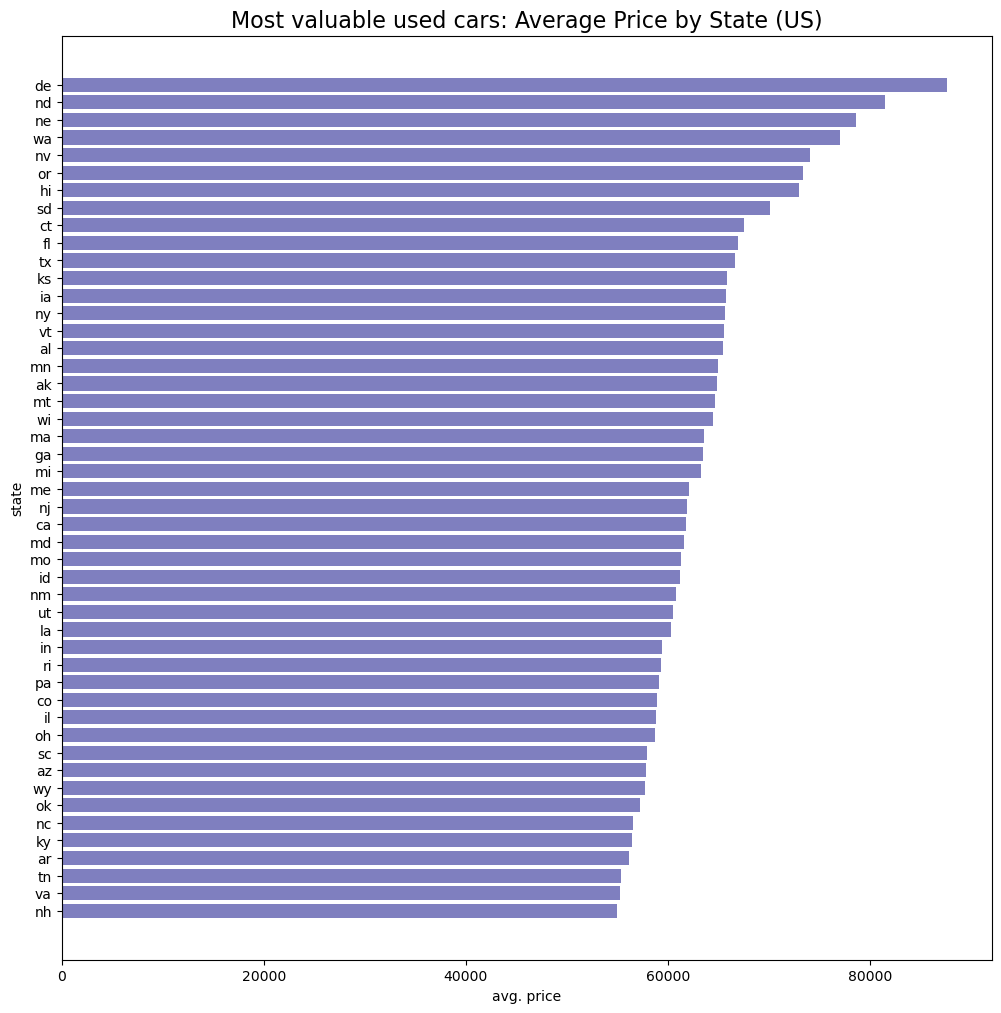

In [2521]:
# Group by state 
most_valuable_cars_df_group_by_state = most_valuable_cars_df.groupby('state')[['price']].mean().sort_values(by='price')

# Create visualization
plt.figure(figsize=(12,12))
plt.barh(width=most_valuable_cars_df_group_by_state.price, 
         y=most_valuable_cars_df_group_by_state.index, 
         color='navy', alpha=0.5)
plt.title('Most valuable used cars: Average Price by State (US)', fontsize=16)
plt.ylabel('state')
plt.xlabel('avg. price')

Text(0.5, 0, 'avg. price')

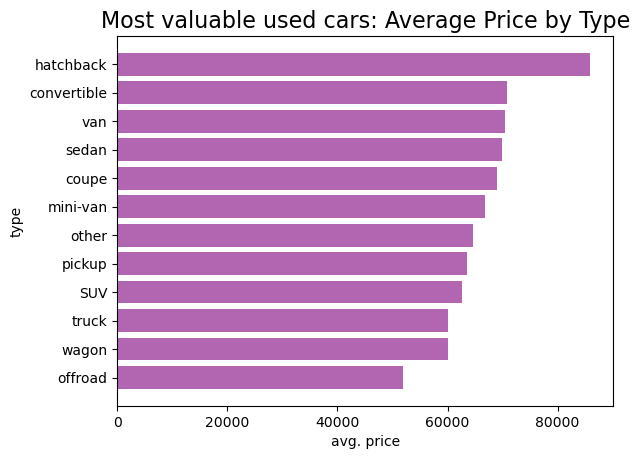

In [2530]:
# Group by type
most_valuable_cars_df_group_by_type = most_valuable_cars_df.groupby('type')[['price']].mean().sort_values(by='price')

# Generate visualization
plt.barh(
    width=most_valuable_cars_df_group_by_type.price, 
    y=most_valuable_cars_df_group_by_type.index,
    color='purple', 
    alpha=0.6)

plt.title('Most valuable used cars: Average Price by Type', fontsize=16)
plt.ylabel('type')
plt.xlabel('avg. price')

Text(0.5, 0, 'avg. price')

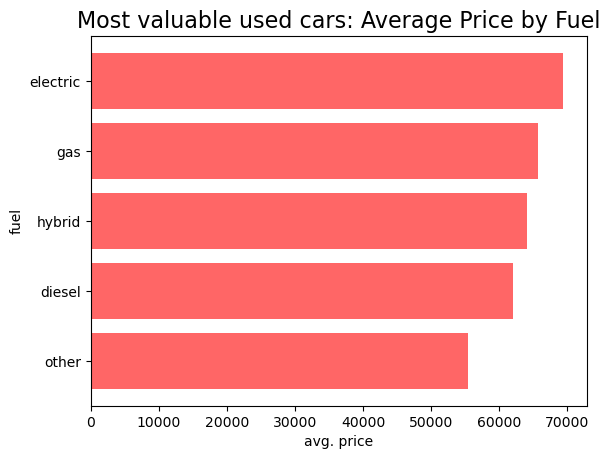

In [2531]:
# Group by fuel
most_valuable_cars_df_group_by_fuel = most_valuable_cars_df.groupby('fuel')[['price']].mean().sort_values(by='price')

# Generate visualization
plt.barh(
    width=most_valuable_cars_df_group_by_fuel.price, 
    y=most_valuable_cars_df_group_by_fuel.index,
    color='red', 
    alpha=0.6)

plt.title('Most valuable used cars: Average Price by Fuel', fontsize=16)
plt.ylabel('fuel')
plt.xlabel('avg. price')

Text(0.5, 0, 'avg. price')

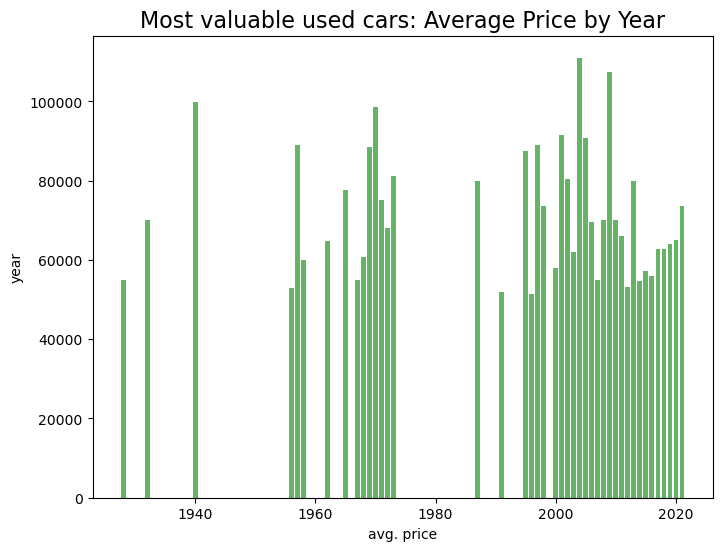

In [2538]:
# Group by year
most_valuable_cars_df_group_by_year = most_valuable_cars_df.groupby('year')[['price']].mean().sort_values(by='price')

# Generate visualization
plt.figure(figsize=(8,6))
plt.bar(height=most_valuable_cars_df_group_by_year.price, 
        x=most_valuable_cars_df_group_by_year.index,
        color='green', 
        alpha=0.6
)

plt.title('Most valuable used cars: Average Price by Year', fontsize=16)
plt.ylabel('year')
plt.xlabel('avg. price')

Text(0.5, 0, 'avg. price')

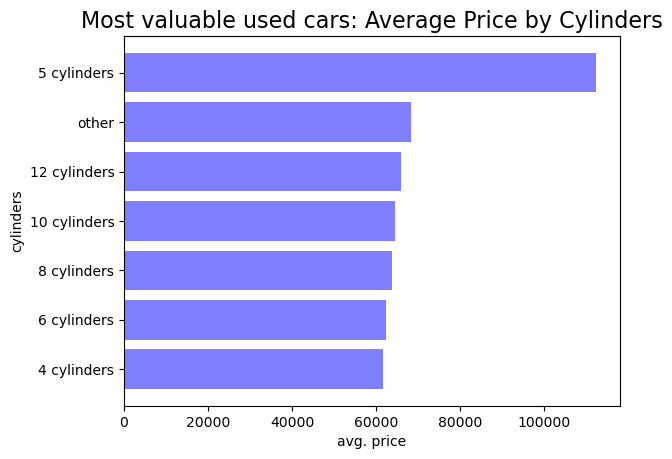

In [2542]:
# Group by cylinders
most_valuable_cars_df_group_by_cylinders = most_valuable_cars_df.groupby('cylinders')[['price']].mean().sort_values(by='price')

# Generate visualization
plt.barh(
    width=most_valuable_cars_df_group_by_cylinders.price, 
    y=most_valuable_cars_df_group_by_cylinders.index,
    color='blue', 
    alpha=0.5
)
plt.title('Most valuable used cars: Average Price by Cylinders', fontsize=16)
plt.ylabel('cylinders')
plt.xlabel('avg. price')

Text(0.5, 0, 'avg. price')

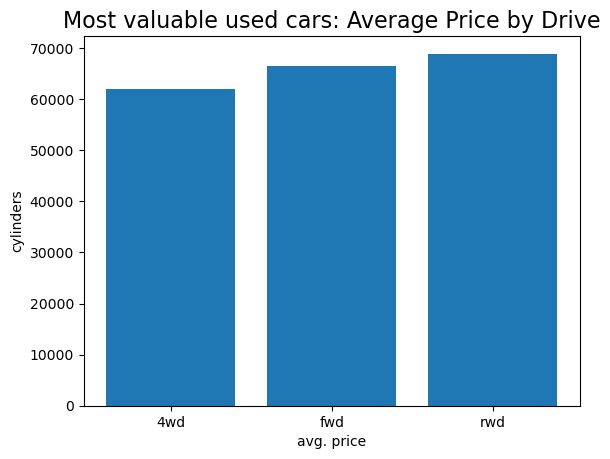

In [2545]:
# Group by drive
most_valuable_cars_df_group_by_drive = most_valuable_cars_df.groupby('drive')[['price']].mean().sort_values(by='price')

# Generate visualization
plt.bar(height=most_valuable_cars_df_group_by_drive.price, 
        x=most_valuable_cars_df_group_by_drive.index
)
plt.title('Most valuable used cars: Average Price by Drive', fontsize=16)
plt.ylabel('cylinders')
plt.xlabel('avg. price')

### Conclusion:
As supported by the results ot our analysis, we conclude that the most important features when determining the price of an used car are "fuel", "type", "year", "cylinders" and "drive". However, as we mentioned the dataset provided contained incomplete data in several entries. This resulted in a data loss of about ~80% of the original dataset. Additionally, the location data provided could not be geodecoded due to the lack of structure of the region field. 

However, even with the such limitations, after our data exploration and data reformatting, we feel confident that the quality of the resulted model led to conclusive results. 